## 1.Implementação de uma MLP para Reconhecimento de Dígitos

Este material didático aborda a implementação de uma Rede Multilayer Perceptron (MLP) para o reconhecimento de dígitos, utilizando o dataset MNIST. O processo será dividido em etapas, com commits individuais no GitHub para facilitar o acompanhamento do desenvolvimento.

### 1.1 Carregamento do Dataset MNIST

O primeiro passo é carregar o dataset MNIST, que contém imagens de dígitos escritos à mão. Utilizaremos o Keras para facilitar o carregamento:


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 1.2 Normalização e Pré-processamento dos Dados

Para melhorar o desempenho da MLP, é importante normalizar os dados, convertendo os pixels para valores entre 0 e 1:

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

As imagens do MNIST são em escala de cinza, com pixels variando de 0 (preto) a 255 (branco). Para normalizar esses valores, convertemos cada pixel para um valor entre 0 e 1. Isso é feito dividindo o valor de cada pixel por 255.0. Ao dividir os pixels por 255, obtemos valores decimais. Para representar esses valores, é necessário um tipo de dado que suporte números de ponto flutuante. O float32 é um tipo de dado de ponto flutuante de 32 bits, que oferece precisão suficiente para representar os valores normalizados dos pixels.

### 1.3 Construção da MLP usando Keras

Com os dados preparados, podemos construir a MLP utilizando o Keras. Definiremos uma arquitetura simples, com duas camadas ocultas:

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 1.4 Definição de Hiperparâmetros Fixos

Para este exemplo, definiremos os seguintes hiperparâmetros fixos:

*   **Camadas**: 2 camadas ocultas
*   **Função de Ativação**: ReLU para as camadas ocultas e Softmax para a camada de saída
*   **Taxa de Aprendizado**: 0.001


### 1.5 Compilação

Com a arquitetura definida, podemos compilar o modelo, especificando a função de perda, otimizador e métricas:

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Em seguida, treinamos o modelo com os dados de treinamento:

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Carregamento dos dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalização e pré-processamento
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Construção do modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8769 - loss: 0.4418
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9632 - loss: 0.1217
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9761 - loss: 0.0790
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9830 - loss: 0.0588
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9865 - loss: 0.0445
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9900 - loss: 0.0333
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9920 - loss: 0.0263
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9938 - loss: 0.0203
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9945 - loss: 0.0189
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9958 - loss: 0.0144


### 1.6 Avaliação do Modelo

Após o treinamento, avaliamos o desempenho do modelo com os dados de teste:

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)

Loss: 0.07871919870376587
Accuracy: 0.9794999957084656


### 1.7 Visualização dos Resultados

Para melhor compreensão dos resultados, podemos gerar gráficos de acurácia e perda ao longo das épocas:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8732 - loss: 0.4397 - val_accuracy: 0.9621 - val_loss: 0.1304
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9659 - loss: 0.1176 - val_accuracy: 0.9704 - val_loss: 0.0969
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9747 - loss: 0.0823 - val_accuracy: 0.9747 - val_loss: 0.0814
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9805 - loss: 0.0604 - val_accuracy: 0.9769 - val_loss: 0.0778
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9873 - loss: 0.0427 - val_accuracy: 0.9752 - val_loss: 0.0800
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9900 - loss: 0.0321 - val_accuracy: 0.9787 - val_loss: 0.0763
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9920 - loss: 0.0261 - val_accuracy: 0.9784 - val_loss: 0.0758
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9946 - loss: 0.0

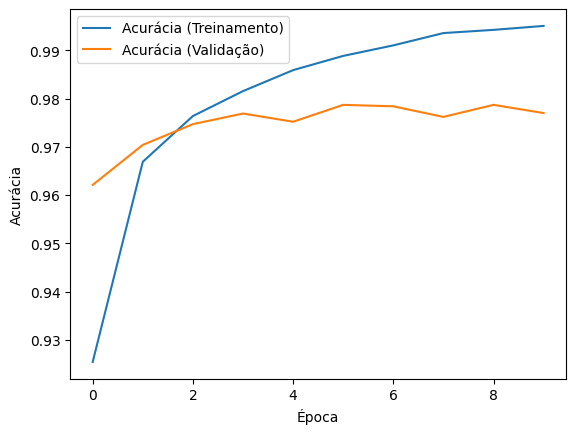

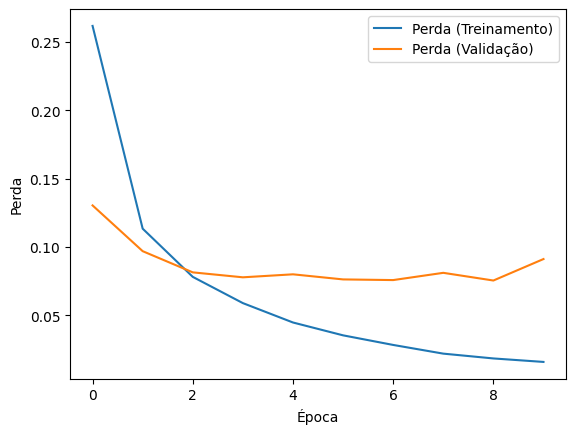

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Carregamento dos dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalização e pré-processamento
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Construção do modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilação do modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo with validation data
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

print(history.history.keys()) # Print keys to verify

# Visualização dos resultados
plt.plot(history.history['accuracy'], label='Acurácia (Treinamento)')
plt.plot(history.history['val_accuracy'], label='Acurácia (Validação)')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Perda (Treinamento)')
plt.plot(history.history['val_loss'], label='Perda (Validação)')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()

Este código irá gerar uma grade 2x5, exibindo os 10 primeiros dígitos do conjunto de treinamento, juntamente com suas respectivas labels.

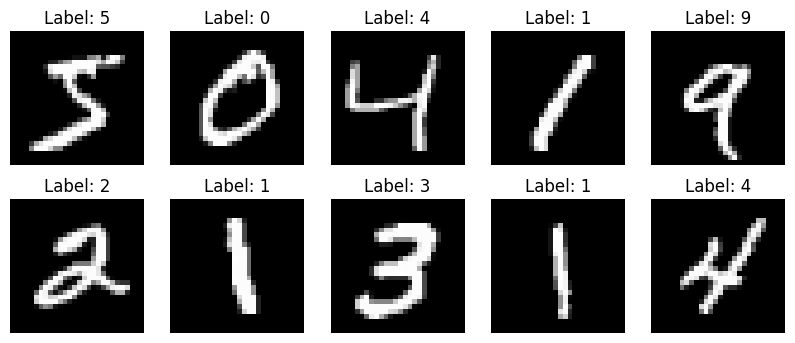

In [ ]:
import matplotlib.pyplot as plt

# Carrega os dados do MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Exibe os 10 primeiros dígitos
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.show()

#2.Métodos de Inicialização de Pesos

Os métodos de inicialização de pesos em redes neurais são técnicas utilizadas para definir os valores iniciais dos parâmetros de uma rede antes do treinamento.

A escolha da inicialização pode impactar diretamente a convergência do modelo, afetando a estabilidade do gradiente e a velocidade de aprendizado. Inicializações inadequadas podem levar a problemas como gradientes desaparecendo (vanishing gradients) ou gradientes explosivos (exploding gradients), dificultando o treinamento da rede.




## 2.1. Como mitigar esses problemas?
Para mitigar esses problemas, diferentes estratégias foram desenvolvidas, como inicialização aleatória, Xavier/Glorot, He e até inicialização zero (que, apesar de ser um caso extremo, exemplifica a importância de um bom método).

O objetivo principal dessas abordagens é garantir que os pesos sejam pequenos o suficiente para evitar explosões de gradientes, mas suficientemente diversos para que diferentes neurônios aprendam representações distintas dos dados.

## 2.2. Inicialização Aleatória

A inicialização aleatória de pesos é uma das estratégias mais simples utilizadas para definir os valores iniciais dos parâmetros em redes neurais antes do treinamento. Seu principal objetivo é evitar a simetria entre os neurônios, garantindo que cada um aprenda diferentes padrões dos dados. Se todos os pesos fossem inicializados com zero, os neurônios dentro de uma mesma camada receberiam gradientes idênticos, tornando-se redundantes e limitando a capacidade da rede. Para evitar esse problema, os pesos podem ser gerados aleatoriamente a partir de distribuições uniformes ou normais (gaussianas). Na distribuição uniforme, os pesos são amostrados dentro de um intervalo
[
−
𝑟
,
𝑟
]
, enquanto na distribuição normal, os pesos seguem uma distribuição gaussiana com média zero e um desvio padrão controlado.


## 2.2.1 Possíveis desvantagens da Inicialização Aleatória
 No entanto, a inicialização aleatória pura pode causar problemas como gradientes explosivos (se os valores dos pesos forem muito grandes) ou gradientes desaparecendo (se forem muito pequenos), dificultando o treinamento da rede. Além disso, a escolha inadequada da distribuição pode interagir negativamente com funções de ativação como sigmoid e tanh, levando a saturação e reduzindo a eficiência da retropropagação. Por conta dessas limitações, métodos mais avançados, como Xavier/Glorot e He, foram desenvolvidos para ajustar dinamicamente os valores iniciais dos pesos de acordo com a arquitetura da rede, otimizando a propagação dos gradientes e melhorando a estabilidade do treinamento.

## 2.2.2 Fórmulas



## Distribuição Normal

A inicialização aleatória de pesos em redes neurais é essencial para evitar a simetria entre os neurônios e permitir um aprendizado eficaz. Para isso, dois métodos comuns de geração de pesos são a distribuição uniforme e a distribuição normal (gaussiana). Ambas são utilizadas para definir valores iniciais dos pesos antes do treinamento da rede, mas cada uma tem suas características específicas e aplicações ideais.



A inicialização uniforme define os pesos
𝑊 dentro de um intervalo [−𝑟,𝑟], onde todos os valores dentro desse intervalo têm a mesma probabilidade de serem escolhidos. A fórmula geral para a distribuição uniforme é: $𝑊∼𝑈(−𝑟,𝑟)$

Isso significa que os pesos são amostrados de uma distribuição uniforme no intervalo definido. A função densidade de probabilidade (PDF) dessa distribuição é dada por:

$$\
P(W) =
\begin{cases}
\frac{1}{2r}, & \text{se } -r \leq W \leq r \\
0, & \text{caso contrário}
\end{cases}$$

Ou seja, todos os valores dentro do intervalo possuem a mesma probabilidade
$ \frac{1}{2r} $ , garantindo que os pesos sejam distribuídos de maneira uniforme.

O valor de 𝑟 pode ser determinado empiricamente ou definido com base no número de neurônios na camada. Se os pesos forem muito grandes, podem causar exploding gradients; se forem muito pequenos, podem levar a vanishing gradients.

Essa inicialização tem algumas vantagens e desvantagens, como as seguintes:

Vantagem: Simplicidade e controle explícito sobre o intervalo dos pesos.

Desvantagem: Pode não ser ideal para funções de ativação como sigmoid e tanh, pois não leva em conta a variação do gradiente.



## Distribuição Gaussiana



Outra abordagem comum é inicializar os pesos seguindo uma distribuição normal (gaussiana) com média zero e variância
$𝜎^2$, ou seja:

$𝑊∼𝑁(0,𝜎^2)$

A função densidade de probabilidade (PDF) para a distribuição normal é:

$$
P(W) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{W^2}{2\sigma^2}}
$$

Isso significa que os pesos estarão concentrados em torno da média 0, com maior probabilidade de assumir valores próximos de zero e menos probabilidade de assumir valores extremos.

Escolha de
𝜎
: O desvio padrão
𝜎
 precisa ser ajustado para garantir que os gradientes não sejam muito grandes nem muito pequenos.
Existem algumas vantagens desse método de iniciação, e desventagens, descritas a seguir:

Vantagem: Apresenta Variância do Gradiente equilibrada entre as camadas, Melhor compatibilidade com redes profundas e algumas funções de ativação, além de  resolver o problema de Simetria entre Neurônios ao atribuir pesos ligeiramente diferentes para cada neurônio, permitindo que cada um aprenda representações distintas.

Desvantagem: Pode ser sensível ao valor escolhido para
𝜎
σ, exigindo ajuste cuidadoso.

## 2.3 Inicialização Xavier/Glorot



A inicialização Xavier/Glorot foi introduzida por **Xavier Glorot e Yoshua Bengio** em 2010, no artigo *Understanding the difficulty of training deep feedforward neural networks*. Esse método foi desenvolvido para resolver os problemas de vanishing gradients (gradientes desaparecendo) e exploding gradients (gradientes explodindo), que frequentemente ocorrem em redes neurais profundas.

O objetivo da inicialização Xavier é manter a variância dos pesos equilibrada ao longo das camadas da rede, garantindo que os gradientes não se tornem muito grandes nem muito pequenos à medida que propagam durante o treinamento. Essa abordagem permite que a rede aprenda de forma mais estável e eficiente.

Durante o treinamento de uma rede neural, os sinais são propagados para frente (forward pass) e para trás (backpropagation). Em cada camada, os pesos \( W \) e as ativações \( a \) são multiplicados, e as funções de ativação são aplicadas. Se os pesos forem muito grandes, os valores da ativação podem crescer exponencialmente, causando exploding gradients. Se os pesos forem muito pequenos, os gradientes diminuem drasticamente, resultando em vanishing gradients.

O método Xavier foi projetado para equilibrar a variância dos pesos de entrada e saída de cada camada, evitando que a escala dos valores aumente ou diminua excessivamente.

---

##  Formulação Matemática da Inicialização Xavier

A ideia principal da inicialização Xavier é definir os pesos de uma camada de forma que a variância das ativações permaneça constante em cada camada. Isso significa que o desvio padrão dos pesos deve ser ajustado com base no número de neurônios da camada.

A inicialização Xavier define os pesos \( W \) de acordo com:

$$
W \sim U\left(-\frac{1}{\sqrt{n_{\text{in}}}}, \frac{1}{\sqrt{n_{\text{in}}}} \right)
$$

ou, na forma normal (gaussiana):

$$
W \sim N\left(0, \frac{1}{n_{\text{in}}} \right)
$$

Onde:
- $ n_{\text{in}} $ é o número de neurônios da camada anterior (número de entradas para a camada atual).
- A versão **uniforme** sorteia os pesos dentro de um intervalo simétrico.
- A versão **gaussiana** (normal) sorteia os pesos com média 0 e variância  $\frac{1}{n_{\text{in}}} $.

Essas equações garantem que a propagação dos sinais permaneça estável ao longo das camadas.

---

##  Como Xavier Equilibra os Gradientes?

A justificativa matemática para essa inicialização vem do desejo de manter a **variância da ativação \( a \)** constante em cada camada. Durante o **forward pass**, queremos evitar que os valores das ativações cresçam ou diminuam excessivamente:

$$
\text{Var}(a) = \text{Var}(W \cdot a_{\text{in}}) = \text{Var}(W) \cdot \text{Var}(a_{\text{in}})
$$

Se a variância de \( W \) for muito grande, os valores da ativação podem crescer a cada camada. Se for muito pequena, os valores da ativação diminuem. Para garantir uma propagação equilibrada, Xavier define a variância dos pesos de modo que a entrada e saída de cada camada tenham valores próximos.

---

##  Versões da Inicialização Xavier

###  Xavier Uniforme
$$
W \sim U\left(-\frac{1}{\sqrt{n_{\text{in}}}}, \frac{1}{\sqrt{n_{\text{in}}}} \right)
$$

Os pesos são amostrados de uma distribuição **uniforme** dentro do intervalo calculado. Essa versão é mais usada quando a função de ativação não possui regiões de saturação severa.

###  Xavier Normal (Gaussiana)
$$
W \sim N\left(0, \frac{1}{n_{\text{in}}} \right)
$$

Os pesos são amostrados de uma **distribuição normal** com média 0 e variância $ \frac{1}{n_{\text{in}}} $. Essa abordagem pode ser útil para funções de ativação que se beneficiam de uma distribuição mais concentrada ao redor da média.

---

## Quando Usar Xavier?

A inicialização Xavier é ideal para **funções de ativação simétricas**, como:
- **Sigmoid**
- **Tanh**

Essas funções podem sofrer com saturação se os pesos iniciais forem muito grandes. A inicialização Xavier ajuda a evitar esse problema, garantindo que as ativações iniciais estejam na faixa apropriada para o aprendizado.

---




## 2.4. Inicialização He

A inicialização He, também conhecida como Kaiming Initialization, foi introduzida por Kaiming He e colaboradores em 2015, no artigo Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification. Esse método foi desenvolvido para otimizar redes neurais profundas que utilizam a função de ativação ReLU (Rectified Linear Unit) e suas variantes, como Leaky ReLU e Parametric ReLU.

## Objetivo

O objetivo da inicialização He é ajustar a escala dos pesos de modo que a variância das ativações seja preservada ao longo das camadas, garantindo uma propagação estável dos gradientes. Esse método ajuda a evitar o problema dos vanishing gradients (gradientes desaparecendo) e exploding gradients (gradientes explodindo), comuns em redes profundas.

Durante o treinamento de uma rede neural, os sinais passam para frente (forward pass) e para trás (backpropagation). Como a função ReLU anula metade das ativações ao definir 𝑓(𝑥)=max⁡(0,𝑥), a inicialização He ajusta a variância dos pesos para compensar essa perda de informação.

O método He foi projetado para garantir que os valores das ativações não diminuam nem aumentem drasticamente conforme passam pelas camadas da rede.

## Formulação Matemática da Inicialização He
A ideia central da inicialização He é definir os pesos de cada camada de forma que a variância da ativação seja mantida durante a propagação da rede. Para isso, o desvio padrão dos pesos deve ser ajustado com base no número de neurônios da camada de entrada.

A inicialização He define os pesos
𝑊 de acordo com:
$$
W \sim U\left(-\sqrt{\frac{2}{n_{\text{in}}}}, \sqrt{\frac{2}{n_{\text{in}}}} \right)
$$
ou na versão Gaussiana, que é :
$$
W \sim N\left(0, \frac{2}{n_{\text{in}}} \right)
$$
Onde:

* $𝑛_{\text{in}}$ é o número de neurônios da camada anterior (entrada da camada atual).

* A versão uniforme sorteia os pesos dentro de um intervalo simétrico.





* A versão gaussiana (normal) sorteia os pesos com média 0 e variância
$\frac2 {n_{\text{in}}}$

O fator
2 na equação compensa a perda de ativação que ocorre devido à natureza da função ReLU.

Essas equações garantem que os gradientes permaneçam estáveis ao longo das camadas, permitindo que redes profundas aprendam de forma eficiente.

##Como o He Equilibra os Gradientes?

A justificativa matemática para essa inicialização vem do objetivo de manter a variância da ativação 𝑎 constante em cada camada. Durante o forward pass, queremos evitar que os valores das ativações cresçam ou diminuam excessivamente:


$$\text{Var}(a) = \text{Var}(W \cdot a_{\text{in}}) = \text{Var}(W) \cdot \text{Var}(a_{\text{in}})$$


No caso da função ReLU, onde a metade das ativações são zeradas
E[𝑓(𝑥)]=0.5𝑥, a variância das ativações diminui. Para compensar essa redução, a inicialização He ajusta a variância dos pesos para:

$$\text{Var}(W) = \frac{2}{n_{\text{in}}}$$

Isso garante que os sinais não desapareçam nem explodam conforme propagam pela rede.

##Versões da Inicialização He

###He Uniforme


$$W \sim U\left(-\sqrt{\frac{2}{n_{\text{in}}}}, \sqrt{\frac{2}{n_{\text{in}}}} \right)$$
Os pesos são amostrados de uma distribuição uniforme dentro do intervalo definido. Essa versão é útil quando se deseja limitar os pesos dentro de um intervalo fixo.


###He Normal (Gaussiana)


$$W \sim N\left(0, \frac{2}{n_{\text{in}}} \right)$$
Os pesos são amostrados de uma distribuição normal com média 0 e variância $\frac2 {n_{\text{in}}}$ . Essa abordagem é mais comum, pois distribuições gaussianas tendem a representar melhor os pesos iniciais de redes profundas.



##Quando Usar He?

A inicialização He é ideal para funções de ativação que não são simétricas, como:

* ReLU
* Leaky ReLU
* Parametric ReLU (PReLU)

Essas funções de ativação zeram metade das ativações, tornando a inicialização Xavier menos eficiente. A inicialização He resolve esse problema, garantindo que os gradientes sejam propagados de forma equilibrada.

## 2.5 Inicialização Zero

A inicialização Zero é uma técnica onde todos os pesos da rede neural são inicializados com o valor zero. Embora essa abordagem possa parecer razoável, na maioria dos casos, ela não é recomendada devido ao problema de redes degeneradas, onde todos os neurônios de uma camada aprendem exatamente os mesmos pesos, tornando a rede ineficaz.



##Possíveis Usos
No entanto, existem alguns casos específicos onde a inicialização zero pode ser usada de maneira controlada, principalmente em camadas específicas de algumas arquiteturas avançadas

##Problema da Simetria dos neurônios
Em redes neurais, os pesos são atualizados durante o backpropagation, e cada neurônio deve aprender representações distintas dos dados. Se todos os pesos forem inicializados com zero, todos os neurônios de uma mesma camada:

* Receberão os mesmos gradientes durante a retropropagação.
* Serão atualizados de maneira idêntica.
* Aprenderão os mesmos padrões, tornando-se redundantes.

A rede se comportará como um modelo linear, perdendo sua capacidade de aprendizado profundo.

Isso significa que a rede não conseguirá aprender representações complexas, pois todos os neurônios da mesma camada se tornarão equivalentes.

###Exemplo Matemático
Se a saída de uma camada totalmente conectada for dada por:

$$𝑍=𝑊𝑋+𝑏$$
Onde:

𝑊 é a matriz de pesos,
𝑋 é a entrada da camada,
𝑏 é o bias.

Se todos os pesos
𝑊 forem zero, então a saída da camada será:

$$𝑍=0𝑋+𝑏=𝑏$$

Ou seja, a única coisa que pode mudar o aprendizado é o bias, tornando a rede quase ineficaz, pois os pesos não terão influência na saída.



##Usos da Inicialização  Zero
Apesar dos problemas mencionados, a inicialização zero pode ser utilizada em casos específicos, como:

* Inicialização de Biases

Em muitas redes neurais, os pesos são inicializados aleatoriamente, mas os bias podem ser inicializados como zero sem causar problemas.
Isso ocorre porque o bias adiciona um deslocamento fixo na ativação do neurônio e não sofre com o problema da simetria dos pesos.

* Algumas Camadas Específicas em Redes Convolucionais (CNNs)

Em arquiteturas profundas de CNNs, a inicialização zero pode ser usada nas camadas finais para estabilizar a rede no início do treinamento.
Algumas técnicas avançadas de regularização podem mitigar os efeitos negativos.
* Modelos Pré-Treinados

Em redes neurais que já foram pré-treinadas, algumas camadas podem ser inicializadas com zero ao realizar fine-tuning, desde que os pesos da maioria das camadas tenham sido previamente aprendidos.

## 2.6 Comparação Com Experimento

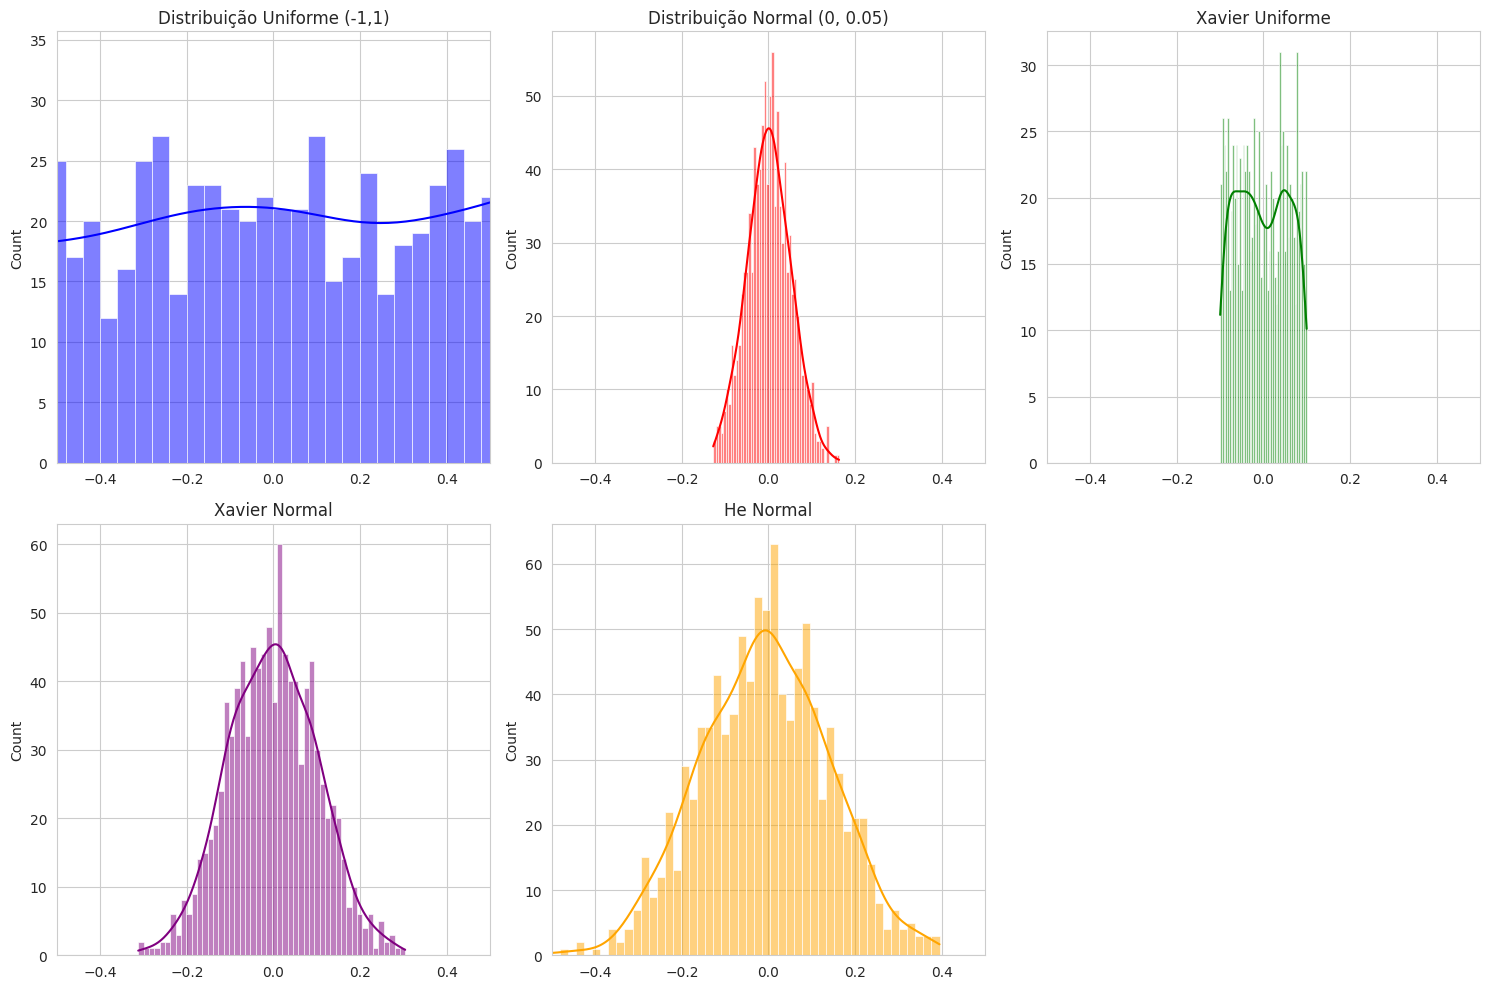

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
from bokeh.io import push_notebook
from bokeh.models import Select
from bokeh.layouts import column



# Configuração do estilo dos gráficos
sns.set_style("whitegrid")

# Definição dos parâmetros
num_pesos = 1000  # Quantidade de pesos a serem gerados
n_in = 100  # Número de neurônios na camada de entrada
limite_x = (-0.5, 0.5)  # Limite fixo para todos os gráficos

# Inicialização dos Pesos
pesos_uniform = np.random.uniform(-1, 1, num_pesos)
pesos_normal = np.random.normal(0, 0.05, num_pesos)
limite_xavier = 1 / np.sqrt(n_in)
pesos_xavier = np.random.uniform(-limite_xavier, limite_xavier, num_pesos)
pesos_xavier_normal = np.random.normal(0, 1 / np.sqrt(n_in), num_pesos)
pesos_he = np.random.normal(0, np.sqrt(2 / n_in), num_pesos)

# Criando Gráficos com Matplotlib para Visualizar as Distribuições
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Função para padronizar os gráficos
def plot_hist(ax, data, title, color):
    sns.histplot(data, bins=50, kde=True, ax=ax, color=color)
    ax.set_title(title)
    ax.set_xlim(limite_x)  # Definir limite fixo para o eixo X

# Criando os subgráficos
plot_hist(axes[0, 0], pesos_uniform, "Distribuição Uniforme (-1,1)", "blue")
plot_hist(axes[0, 1], pesos_normal, "Distribuição Normal (0, 0.05)", "red")
plot_hist(axes[0, 2], pesos_xavier, "Xavier Uniforme", "green")
plot_hist(axes[1, 0], pesos_xavier_normal, "Xavier Normal", "purple")
plot_hist(axes[1, 1], pesos_he, "He Normal", "orange")

# Remover eixo extra
axes[1, 2].axis('off')

# Ajuste da disposição dos gráficos
plt.tight_layout()
plt.show()

# Criando Gráfico Interativo com Bokeh
output_notebook()

# Criando um histograma para cada distribuição
hist_uniform, edges_uniform = np.histogram(pesos_uniform, bins=50, range=limite_x)
hist_normal, edges_normal = np.histogram(pesos_normal, bins=50, range=limite_x)
hist_xavier, edges_xavier = np.histogram(pesos_xavier, bins=50, range=limite_x)
hist_xavier_normal, edges_xavier_normal = np.histogram(pesos_xavier_normal, bins=50, range=limite_x)
hist_he, edges_he = np.histogram(pesos_he, bins=50, range=limite_x)

# Criando a figura
p = figure(title="Comparação das Inicializações de Pesos",
           x_axis_label="Valor dos Pesos", y_axis_label="Frequência",
           width=800, height=500)

# Adicionando os histogramas em camadas para comparação
p.quad(top=hist_uniform, bottom=0, left=edges_uniform[:-1], right=edges_uniform[1:],
       fill_alpha=0.3, color="blue", legend_label="Uniforme (-1,1)")

p.quad(top=hist_normal, bottom=0, left=edges_normal[:-1], right=edges_normal[1:],
       fill_alpha=0.3, color="red", legend_label="Normal (0, 0.05)")

p.quad(top=hist_xavier, bottom=0, left=edges_xavier[:-1], right=edges_xavier[1:],
       fill_alpha=0.3, color="green", legend_label="Xavier Uniforme")

p.quad(top=hist_xavier_normal, bottom=0, left=edges_xavier_normal[:-1], right=edges_xavier_normal[1:],
       fill_alpha=0.3, color="purple", legend_label="Xavier Normal")

p.quad(top=hist_he, bottom=0, left=edges_he[:-1], right=edges_he[1:],
       fill_alpha=0.3, color="orange", legend_label="He Normal")

# Configurações do gráfico interativo
p.legend.location = "top_right"
p.add_tools(HoverTool())


# Exibir gráfico no Jupyter Notebook
show(p, notebook_handle=True)




#3.Impacto da Inicialização de Pesos



A inicialização de pesos desempenha um papel fundamental no desempenho das redes neurais, influenciando diretamente a convergência do modelo, a estabilidade do treinamento e a qualidade do aprendizado. Uma inicialização inadequada pode levar a problemas como exploding gradients (gradientes explodindo) e vanishing gradients (gradientes desaparecendo), dificultando o aprendizado da rede e comprometendo sua eficiência.

## 3.1 Importância da inicialização de pesos


A inicialização dos pesos é um dos fatores mais críticos para o sucesso do treinamento de uma rede neural. Uma boa inicialização permite que a rede aprenda de maneira eficiente, enquanto uma má inicialização pode dificultar ou até impedir o aprendizado. Os principais motivos pelos quais a inicialização de pesos é importante incluem:

###Prevenção de Vanishing e Exploding Gradients
Se os pesos iniciais forem muito pequenos, os gradientes podem diminuir exponencialmente ao longo das camadas, resultando em vanishing gradients, onde a rede não consegue atualizar seus pesos corretamente. Por outro lado, se os pesos forem muito grandes, os gradientes podem explodir, tornando o treinamento instável.

###Aceleração da Convergência
Uma inicialização bem escolhida ajuda a rede a convergir mais rapidamente para um ótimo local da função de perda. Isso reduz a necessidade de ajustes manuais na taxa de aprendizado e evita longos tempos de treinamento.

### Evita Redes Degeneradas
Como visto na Inicialização Zero, se os pesos forem inicializados incorretamente, todos os neurônios de uma mesma camada podem aprender os mesmos valores, resultando em uma rede neural redundante, que se comporta como um modelo linear e perde sua capacidade de aprendizado.

###Compatibilidade com Funções de Ativação

Diferentes funções de ativação possuem comportamentos distintos. Métodos como Xavier são ideais para sigmoid e tanh, pois mantêm a variância dos gradientes equilibrada, enquanto He Initialization é mais adequada para ReLU e suas variantes, compensando a perda de ativação

###Melhor Generalização
Uma inicialização adequada ajuda a rede a aprender representações mais diversas e generalizáveis, evitando que o modelo fique preso em mínimos locais ruins ou que aprenda padrões irrelevantes dos dados.



## 3.2 Problemas causados por inicialização inadequada:


A escolha incorreta da inicialização de pesos pode afetar significativamente o desempenho da rede neural, resultando em dificuldades de convergência, treinamento instável e baixa capacidade de aprendizado. Os principais problemas que surgem devido a uma inicialização inadequada são:

* Vanishing Gradients (Gradientes Desaparecendo)
* Exploding Gradients (Gradientes Explodindo)
* Redes Degeneradas (Neurônios Redundantes)
* Convergência Lenta ou Treinamento Ineficiente

###Gradientes explosivos (exploding gradients)


O problema de exploding gradients ocorre quando os gradientes se tornam muito grandes, fazendo com que os pesos da rede aumentem exponencialmente, tornando o treinamento instável.

* Causa:

Inicializar pesos muito grandes leva a ativações muito altas, resultando em gradientes que crescem exponencialmente na retropropagação.
Pode ocorrer em redes muito profundas, onde pequenos erros se acumulam camada após camada.

* Consequência:

O treinamento se torna instável e a função de perda pode oscilar violentamente.
A rede pode divergir, resultando em pesos extremamente altos ou NaN (não numéricos).

* Como Evitar?

Usar inicializações como He (Kaiming Initialization), que ajusta os pesos para redes com ReLU. Além disso, pode-se aplicar Gradient Clipping, limitando o valor máximo dos gradientes ou utilizar Batch Normalization para manter os valores dentro de uma faixa segura.

###Gradientes desaparecendo (vanishing gradients)

Esse problema ocorre quando os gradientes se tornam extremamente pequenos durante a backpropagation, reduzindo a capacidade da rede de atualizar seus pesos e aprender padrões complexos.

* Causa

Inicializar pesos muito pequenos faz com que os gradientes diminuam rapidamente à medida que são propagados para trás nas camadas da rede.
Ocorre principalmente em redes profundas que utilizam funções de ativação sigmoid ou tanh, pois essas funções têm regiões onde os gradientes são quase zero.
* Consequência

A rede aprende muito devagar ou para completamente de aprender.
Camadas iniciais da rede ficam inúteis, pois os gradientes que chegam até elas são praticamente zero.

* Como Evitar?

Usar inicializações como Xavier/Glorot (mantém a variância dos gradientes equilibrada),
Utilizar ReLU ao invés de sigmoid/tanh, pois a ReLU reduz a chance de saturação,
ou Aplicar Batch Normalization, que ajuda a estabilizar os gradientes.



### Convergência Lenta ou Treinamento Ineficiente

Se a inicialização não for apropriada, a rede pode demorar muito para aprender, mesmo que os gradientes não desapareçam nem explodam.

* Causa

Inicializar pesos com variâncias mal escolhidas pode fazer com que os valores de ativação demorem a entrar na faixa de aprendizado ideal.
Ademais, uma inicialização muito conservadora (com pesos pequenos demais) pode resultar em passos de atualização muito pequenos durante o treinamento.

* Consequência

A rede pode precisar de muitas épocas para aprender um padrão simples.
O modelo pode precisar de taxas de aprendizado muito altas, o que pode gerar instabilidade.

* Como Evitar?

 Usar inicializações apropriadas como He (para ReLU) ou Xavier (para Sigmoid/Tanh). Além disso, pode-se ajustar a taxa de aprendizado junto com a inicialização dos pesos e utilizar schedulers de taxa de aprendizado, como StepLR ou CosineAnnealing.

## 3.3 Testes práticos comparando os métodos de inicialização

Esse código implementa um experimento comparando diferentes métodos de inicialização de pesos em uma rede neural MLP treinada no dataset MNIST. O objetivo é avaliar como a inicialização afeta a convergência e o desempenho da rede.

Ademais, no código abaixo, a Inicialização Aleatória foi descrita como "default".


Treinando com default...

Inicialização: default | Época [1/10], Loss: 1.4731
Inicialização: default | Época [2/10], Loss: 0.5148
Inicialização: default | Época [3/10], Loss: 0.3916
Inicialização: default | Época [4/10], Loss: 0.3488
Inicialização: default | Época [5/10], Loss: 0.3235
Inicialização: default | Época [6/10], Loss: 0.3048
Inicialização: default | Época [7/10], Loss: 0.2892
Inicialização: default | Época [8/10], Loss: 0.2755
Inicialização: default | Época [9/10], Loss: 0.2633
Inicialização: default | Época [10/10], Loss: 0.2517

Treinando com xavier...

Inicialização: xavier | Época [1/10], Loss: 0.6798
Inicialização: xavier | Época [2/10], Loss: 0.3487
Inicialização: xavier | Época [3/10], Loss: 0.3002
Inicialização: xavier | Época [4/10], Loss: 0.2712
Inicialização: xavier | Época [5/10], Loss: 0.2483
Inicialização: xavier | Época [6/10], Loss: 0.2309
Inicialização: xavier | Época [7/10], Loss: 0.2154
Inicialização: xavier | Época [8/10], Loss: 0.2023
Inicialização: xav

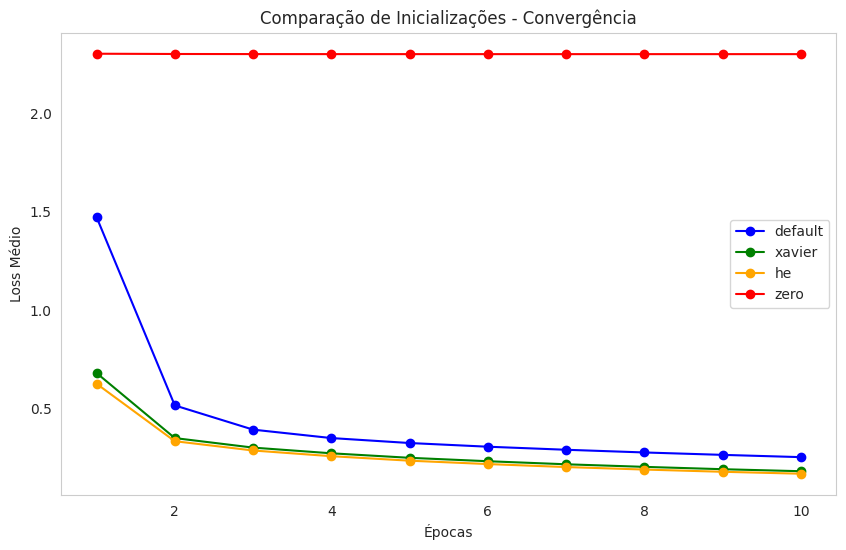

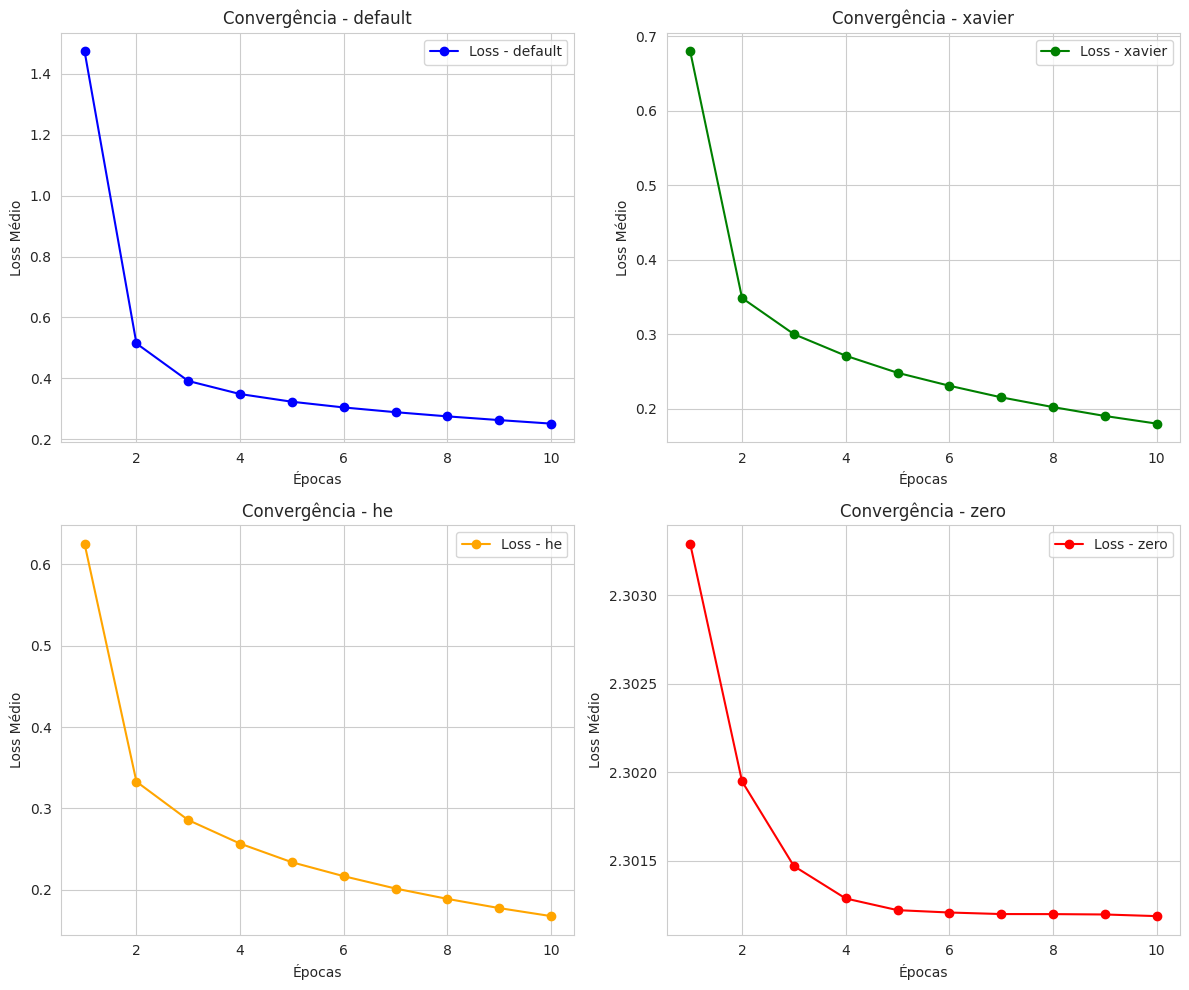

In [ ]:
# Reimportando as bibliotecas necessárias após o reset do estado
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Definir a semente para garantir reprodutibilidade
def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    torch.cuda.manual_seed_all(seed)

# Definição dos hiperparâmetros
batch_size = 128
learning_rate = 0.01
epochs = 10
seed_value = 42  # Valor da semente

# Transformação e carregamento do dataset MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Definição da rede neural
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Aplicação das inicializações
def init_weights(model, init_method):
    if init_method == "xavier":
        nn.init.xavier_uniform_(model.fc1.weight)
        nn.init.xavier_uniform_(model.fc2.weight)
        nn.init.xavier_uniform_(model.fc3.weight)
    elif init_method == "he":
        nn.init.kaiming_uniform_(model.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(model.fc2.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(model.fc3.weight, nonlinearity='relu')
    elif init_method == "zero":
        nn.init.zeros_(model.fc1.weight)
        nn.init.zeros_(model.fc2.weight)
        nn.init.zeros_(model.fc3.weight)

# Função para treinar a rede neural
def train_model(init_method):
    set_seed(seed_value)  # Garante que cada modelo inicie com a mesma semente
    model = MLP()
    init_weights(model, init_method)  # Aplica a inicialização selecionada

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_losses = []

    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"Inicialização: {init_method} | Época [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

    return train_losses

# Teste das diferentes inicializações
methods = ["default", "xavier", "he", "zero"]
loss_results = {}

for method in methods:
    print(f"\nTreinando com {method}...\n")
    loss_results[method] = train_model(method)

# Definindo cores diferentes para cada inicialização
colors = {
    "default": "blue",
    "xavier": "green",
    "he": "orange",
    "zero": "red"
}

# Gráfico Único Comparando Todas as Inicializações
plt.figure(figsize=(10, 6))
for method, losses in loss_results.items():
    plt.plot(range(1, epochs+1), losses, marker='o', linestyle='-', label=method, color=colors.get(method, "black"))

plt.xlabel("Épocas")
plt.ylabel("Loss Médio")
plt.title("Comparação de Inicializações - Convergência")
plt.legend()
plt.grid()
plt.show()

# Criando Subplots Individuais para Cada Inicialização
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid para até 4 inicializações

methods_list = list(loss_results.keys())  # Lista com os nomes das inicializações

# Mapeando cada inicialização para um gráfico separado
for i, method in enumerate(methods_list):
    row, col = divmod(i, 2)  # Define a posição no subplot
    axes[row, col].plot(range(1, epochs+1), loss_results[method], marker='o', linestyle='-', label=f"Loss - {method}", color=colors.get(method, "black"))
    axes[row, col].set_xlabel("Épocas")
    axes[row, col].set_ylabel("Loss Médio")
    axes[row, col].set_title(f"Convergência - {method}")
    axes[row, col].legend()
    axes[row, col].grid(True)

# Removendo plots vazios (caso haja menos de 4 inicializações)
if len(methods_list) < 4:
    for i in range(len(methods_list), 4):
        fig.delaxes(axes.flatten()[i])

# Ajuste para melhor visualização
plt.tight_layout()
plt.show()



## 3.4 Gráficos de convergência e impacto na performance

Para comparar o impacto da performace de cada inicialização, podemos reimpimir o gráfico comparativo abaixo

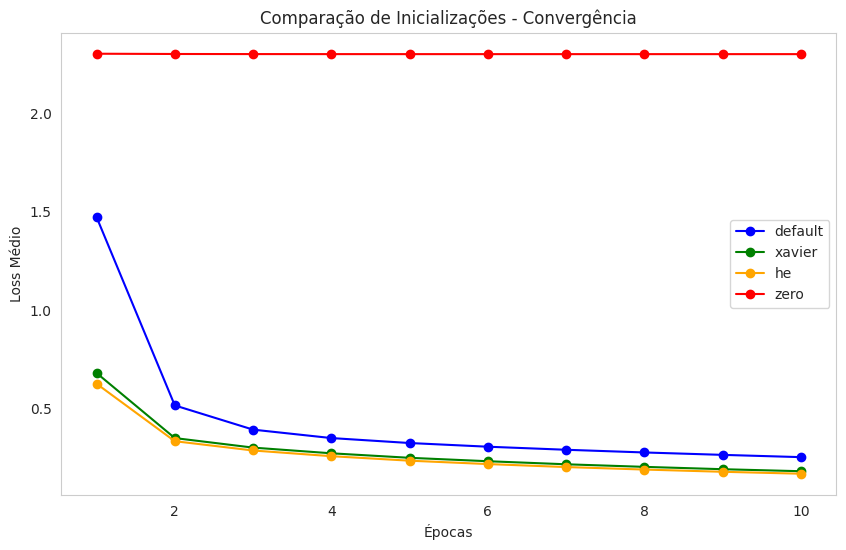

In [ ]:
# Reimprimir o gráfico de convergência das inicializações
plt.figure(figsize=(10, 6))
for method, losses in loss_results.items():
    plt.plot(range(1, epochs+1), losses, marker='o', linestyle='-', label=method, color=colors.get(method, "black"))

plt.xlabel("Épocas")
plt.ylabel("Loss Médio")
plt.title("Comparação de Inicializações - Convergência")
plt.legend()
plt.grid()
plt.show()

O gráfico de convergência ilustra como diferentes métodos de inicialização afetam o desempenho do treinamento e a estabilidade da rede neural. A inicialização dos pesos influencia a rapidez com que a loss diminui, a estabilidade do aprendizado e a capacidade da rede de generalizar para novos dados. Vamos analisar cada inicialização separadamente com base nos resultados observados.

###He Initialization (Amarelo) 🟡
 Melhor desempenho e convergência mais rápida. Projetada para ReLU, evitando o problema de vanishing gradients. Mantém a variância dos gradientes equilibrada em redes profundas.
* Consequência:

Permite um treinamento mais eficiente e estável.
Evita que os gradientes desapareçam ou explodam.
Ideal para redes neurais profundas com ReLU ou variantes (Leaky ReLU, PReLU).
### Xavier Initialization (Verde) 🟢
Desempenho bom, mas ligeiramente inferior ao He.
Criada para funções sigmoid e tanh, mantendo os gradientes equilibrados.
Garante que as ativações não fiquem muito altas nem muito baixas.
* Consequência:

Funciona bem para funções sigmoides, mas pode não ser ideal para ReLU.
Convergência um pouco mais lenta do que He, mas ainda eficaz.
Melhor escolha para redes não tão profundas.
### Padrão do PyTorch (Azul) 🔵
Método utilizado por padrão no torch.nn.Linear().
Pode variar dependendo da arquitetura, mas geralmente usa uma distribuição normal aleatória padrão.
* Consequência:

Pode não ser a inicialização mais otimizada para redes profundas.
Convergência um pouco mais lenta do que Xavier e He.
Ainda funciona, mas pode exigir mais ajustes de hiperparâmetros.

### Inicialização Zero (Vermelho) 🔴
Pior desempenho, pois a rede não aprende!
Causa que todos os neurônios aprendem os mesmos pesos, levando à degeneração da rede.
* Consequência:

Os gradientes são iguais para todos os neurônios, impedindo a aprendizagem.
A rede se comporta como um modelo linear, sem capacidade de representar padrões complexos.
Nunca deve ser usada para inicializar pesos, apenas biases!


# 4. Otimizadores

Otimizadores são métodos utilizados para ajustar os parâmetros de uma rede neural durante seu treinamento, de modo a **minimizar o valor da função de perda** com mais eficácia e idealmente atingir um mínimo global. Os  otimizadores abordados nessa seção serão:

1. **SGD (Stochastic Gradient Descent)**
2. **SGD + Momentum**
3. **Nesterov**
4. **AdaGrad**
5. **RMSprop**
6. **Adam**

## 4.1 SGD (Stochastic Gradient Descent)

O SGD, ou Descida do Gradiente Estocástico, é um dos mais simples algoritmos de otimização utilizados. Como o próprio nome sugere, ele usa o **Gradiente** da função de perda para "descer-la", sempre tentando atingir um valor menor do que o anterior. A atualização de parâmetros é feita com a seguinte fórmula:

$$𝑊_{t+1} = 𝑊_{t} − 𝜂 ⋅ ∇𝐿(𝑊_{t})$$

Onde:

- **$𝑊_{t}$** representa os parâmetros da rede na iteração 𝑡.

- **$𝜂$** é a taxa de aprendizado, um hiperparâmetro que controla o tamanho do passo na direção do gradiente.

- **$∇𝐿(𝑊_{t})$** é o gradiente da função de perda 𝐿 em relação aos pesos.

Essa atualização é feita em cada iteração para cada um das amostras da rede. Isso pode ser um problema para um número grande de amostras, visto que fazer o cálculo do gradiente se tornaria muito custoso, tanto em relação ao tempo necessário para executar a operação quanto ao **custo computacional**. Além disso, a convergência desse método o pode ser muito lenta, visto que cada amostra influencia diretamente na alteração dos parâmetros.

### **Impacto de diferentes inicializações**

O SGD é altamente sensível à inicialização. Se os pesos forem muito pequenos, os gradientes também serão pequenos, levando a uma convergência muito lenta (vanishing gradients). Se forem muito grandes, os gradientes podem crescer rapidamente, tornando o treinamento instável (exploding gradients).

- He Initialization é recomendada para redes com ReLU, pois mantém os gradientes equilibrados, enquanto Xavier Initialization é uma boa escolha para redes com sigmoid ou tanh, garantindo que os gradientes não desapareçam.

- Inicialização Zero não funciona com SGD, pois todos os neurônios aprenderiam os mesmos pesos, resultando em uma rede degenerada.

## 4.2 Métodos baseados em Momento

Os méodos baseados em momento buscam **acelerar a convergência** de algoritmos de descida de gradiente, tratando problemas como a oscilações nas atualizações de parâmetros, travamento em mínimos locais, e a demora na convergência. Como exemplos serão abordados o **SGD + Momentum** e o **Nesterov**

### 4.2.1 SGD + Momentum

Esse algoritmo introduz termo de **"velocidade"** ao cálculo de atualização de pesosdo SGD comum. Esse termo é baseado nos gradientes das **iterações passadas**, permitindo que o algoritmo "lembre" da direção que estava tomando.

$$𝑊_{t+1} = 𝑊_{t} + v_{t+1}$$

Esse termo é dado por

$$ v_{t+1} = \rho v_{t} − 𝜂 ⋅ ∇𝐿(𝑊_{t})$$

Então a equação geral fica assim:
$$𝑊_{t+1} = 𝑊_{t} + \rho v_{t} − 𝜂 ⋅ ∇𝐿(𝑊_{t})$$
Onde:


- **$v_{t}$** é a velocidade

- **$\rho$** é o momento, um hiperparâmetro que controla o quanto do gradiente passado é mantido.

Esse método **reduz as oscliações** entre atualizações de parâmetros e funciona bem em superfícies com vales estreitos, **acelerando a convergência**. No entanto, ele também está suscetível a **overshooting**, ou seja, a passar do mínimo global.

### **Impacto de diferentes inicializações**

Se os pesos forem inicializados muito grandes, o momentum pode acelerar a rede na direção errada, dificultando a convergência.
Se forem muito pequenos, o momentum pode não ter um impacto significativo.

- Inicializações equilibradas, como Xavier e He, garantem que o momentum funcione corretamente, mantendo o treinamento estável.

### 4.2.2 Nesterov

É uma variação do SGD + Momentum, que ao invés de calcular o gradiente  nos valores atuais dos parâmetros, ele calcula o **gradiente na posição futura** prevista dos parâmetros, levando a atualizações mais informadas e potencialmente mais eficazes.

$$𝑊_{t+1} = 𝑊_{t} + \rho v_{t} − 𝜂 ⋅ ∇𝐿(𝑊_{t} + \rho v_{t})$$

Essa adição permite mitigar as desvantagens do SGD com momento, principalmente na presença de alta curvatura ou gradientes ruidosos, resultando numa maior estabilidade com **menos oscilações** e menor chance de overshooting, **acelerando a convergência** ainda mais, mas isso vem com um **custo computacional maior**.

### **Impacto de diferentes inicializações**

- Inicializar os pesos com 0 resulta no mesmo problema de simetria do SGD e SGD com momento.

- Inicializações aleatórias com pesos muito grandes ou muito pequenos podem gerar oscilaçoes e prejudicar a convergência

- Glorot/Xavier funciona bem para funções de ativação sigmoide/tahn, mas pode ter dificuldades com ReLU devido a gradientes morrendo.

- He funciona bem com ReLU, mantendo gradientes ativos e acelerando o aprendizado de modo estável


## 4.3 Métodos Adaptativos

Diferentemente dos outros métodos abordados, os métodos adaptativos se destacam por **ajustarem automaticamente e dinamicamente a taxa de aprendizado** durante o treinamento. Isso significa que pesos diferentes podem ter taxas de atualização diferentes, o que pode acelerar a convergência e melhorar a estabilidade.

### 4.3.1 AdaGrad (Adapative Gradient)

O AdaGrad pega esse conceito e aplica ao SGD, ajustando a taxa de aprendizado para cada parâmetro individualmente. Isso é feito pela introdução do fator $G_{t}$

$$G_{t + 1} = G_{t} + ∇𝐿(𝑊_{t})^2$$


$$𝑊_{t+1} = 𝑊_{t} − \frac{𝜂}{\sqrt{G_{t}} + \varepsilon} ⋅ ∇𝐿(𝑊_{t})$$

Onde:
- $G_{t}$ é a soma dos gradientes ao quadrado
- $\varepsilon$ é um estabilizador númerico, usado para evitar a divisão por 0

A ideia é que se o gradiente de um parâmetro mudou drasticamente, ele deve ter feito progresso em direção ao mínimo desejado, então sua taxa de aprendizado é reduzida proporcionalmente. Se o gradiente muda pouco, foi feito pouco progresso e a taxa de aprendizado é pouco reduzida. Isso permite que o algoritmo aprenda mais em uma direção do que outras, sendo favorável para certos tipos de surpefície de função de perda. Apesar disso, a taxa de aprendizado não é capaz de aumentar e **sempre diminui**, o que pode desacelerar a convergência, mesmo quando a trajetória ideal é clara.

### **Impacto de diferentes inicializações**

- Inicializações extremas e com 0 afetam fortemente o acumulo de gradientes ao longo do tempo, gerando instabilidade.

- A inicialização Xavier/Glorot pode funcionar bem, mas corre o risco da taxa de aprendizado ser reduzida muito cedo

- He Pode ter gradientes muito grandes no início, reduzindo a eficácia do AdaGrad



### 4.3.2 RMSprop (Root Mean Squared Propagation)

Para evitar o problema de gradiente sempre crescentes do Adagrad, o RMSprop introduziu um termo hiperparâmetro $\beta$ para determinar o quanto dos gradientes passados seria levado em conta nos cálculos seguintes

$$G_{t + 1} = \beta G_{t} + (1 - \beta)∇𝐿(𝑊_{t})^2$$

$$𝑊_{t+1} = 𝑊_{t} − \frac{𝜂}{\sqrt{G_{t}} + \varepsilon} ⋅ ∇𝐿(𝑊_{t})$$

Onde $\beta$ é um hiperparâmetro de suavização sendo que  $0<\beta \leq 1$

Essa mudança retira o problema do Adagrad e é útil para problemas não estacionários, como redes recorrentes, e se adapta a diferentes gradientes. Apesar disso, o ajuste errôneo de  $\beta$ pode levar a atualizações instáveis

### **Impacto de diferentes inicializações**

- Menos afetado por inicializações extremas não afetam tanto o RMSprop, pois ele adapta automaticamente a taxa de aprendizado.

- Inicializações com 0 fazem com que não haja aprendizado

- Inicializações bem equilibradas como Xavier ou He são benéficas.

### 4.3.3 Adam (Adaptative Momentum)

O método Adam junta a **atualização de taxa de erro** dos métodos adaptativos com a ideia de **momento**.


$$m_{t+1} = \beta_{1} m_{t} − (1 - \beta_{1}) ⋅ ∇𝐿(𝑊_{t}),    \hat m_{t+1} = \frac{m_{t+1}}{1-\beta_{1}^2}$$

$$G_{t + 1} = \beta_{2} G_{t} + (1 - \beta_{2})∇𝐿(𝑊_{t})^2,   \hat G_{t+1} = \frac{G_{t+1}}{1-\beta_{2}^2}$$


$$𝑊_{t+1} = 𝑊_{t} − \frac{𝜂}{\sqrt{\hat G_{t}} + \varepsilon} ⋅\hat m_{t+1}$$



Onde:
- $m_{t}$ é a média móvel dos gradientes (similar ao momentum)
- $G_{t}$ é a média móvel dos quadrados dos gradientes (similar ao RMSprop)
- $\beta_{1}$ e $\beta_{2}$ são hiperparâmetros (com valores típicos de 0,9 e 0,999, respectivamente).
- $\hat m_{t+1}$ e $\hat G_{t+1}$ são as versões corrigidas de $m_{t}$ e $G_{t}$, respectivamente, ajustadas para remover viés inicial

O uso de momento e taxas de aprendizado adaptativas ajuda a rede a convergir mais rapidamente e de forma mais estável, evitando grandes oscilações ou uma convergência muito lenta. O Adam funciona bem mesmo com grandes volumes de dados ou quando a função de perda é muito ruidosa. Por esses motivos, esse algoritmo é um dos mais utilizados atualmente. Apesar disso, o Adam ainda é sensível aos seus hiperparâmetros, e pela sua natureza adaptativa, o Adam pode acabar fazendo sobreajustes em alguns se não for controlado.

### **Impacto de diferentes inicializações**

- Menos sensível à inicialização de pesos aleatórios e extremos, pois ajusta dinamicamente a taxa de aprendizado. Ainda assim, uma inicialização ruim pode afetar o tempo de convergência.

- Uma inicialização com faz com ue os gradientes sejam sempre os mesmo, prejudicando aprendizado

- He e Xavier Initialization são recomendadas para um treinamento mais eficiente.

## 4.4. Experimentos práticos testando otimizadores com diferentes inicializações

A seguir, será mostrada na prática como diferentes inicializações afetam os diferentes otimizadores. Ao final, será exibido um gráfico comparativo entre todos os casos, bem como um gráfico individual para cada um. Nesse caso, será usada a base de dados MNIST e a função de ativação ReLU.


Treinando com Inicialização: default e Otimizador: SGD

Inicialização: default | Otimizador: SGD | Época [1/5], Loss: 1.4731
Inicialização: default | Otimizador: SGD | Época [2/5], Loss: 0.5148
Inicialização: default | Otimizador: SGD | Época [3/5], Loss: 0.3916
Inicialização: default | Otimizador: SGD | Época [4/5], Loss: 0.3488
Inicialização: default | Otimizador: SGD | Época [5/5], Loss: 0.3235

Treinando com Inicialização: default e Otimizador: SGD+Momentum

Inicialização: default | Otimizador: SGD+Momentum | Época [1/5], Loss: 0.5439
Inicialização: default | Otimizador: SGD+Momentum | Época [2/5], Loss: 0.2254
Inicialização: default | Otimizador: SGD+Momentum | Época [3/5], Loss: 0.1604
Inicialização: default | Otimizador: SGD+Momentum | Época [4/5], Loss: 0.1280
Inicialização: default | Otimizador: SGD+Momentum | Época [5/5], Loss: 0.1046

Treinando com Inicialização: default e Otimizador: Nesterov

Inicialização: default | Otimizador: Nesterov | Época [1/5], Loss: 0.5267
Inicia

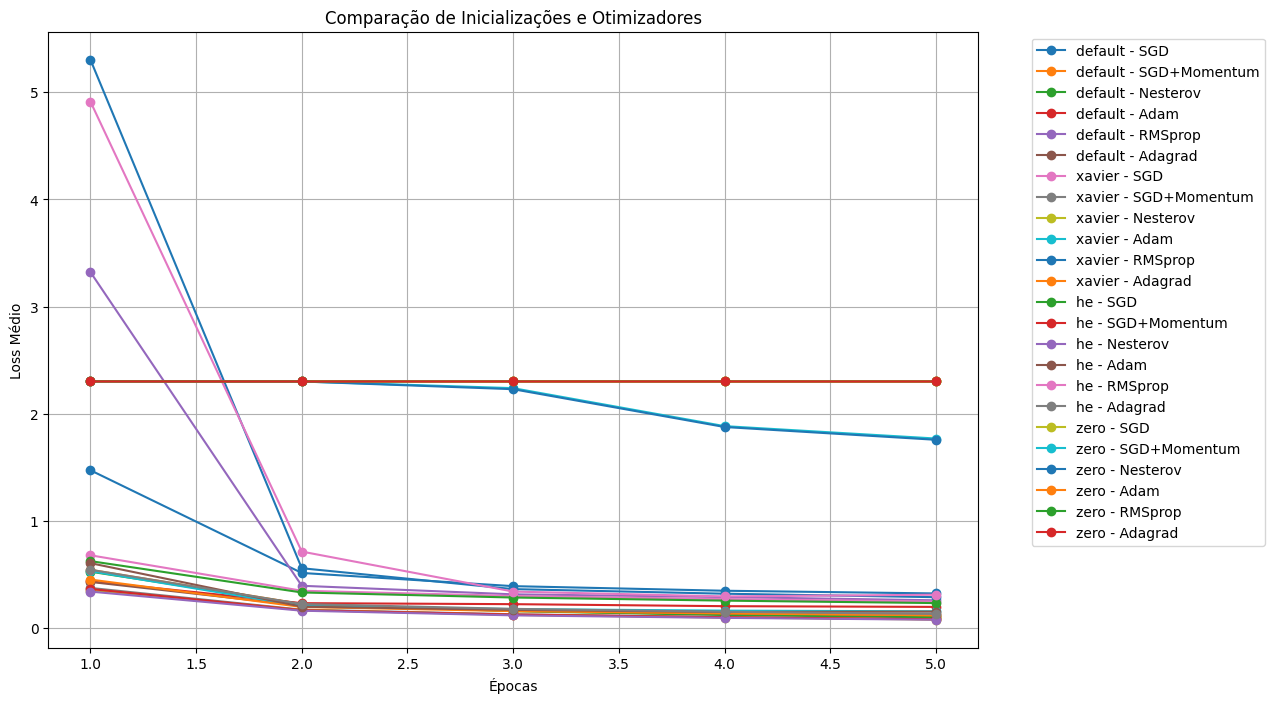

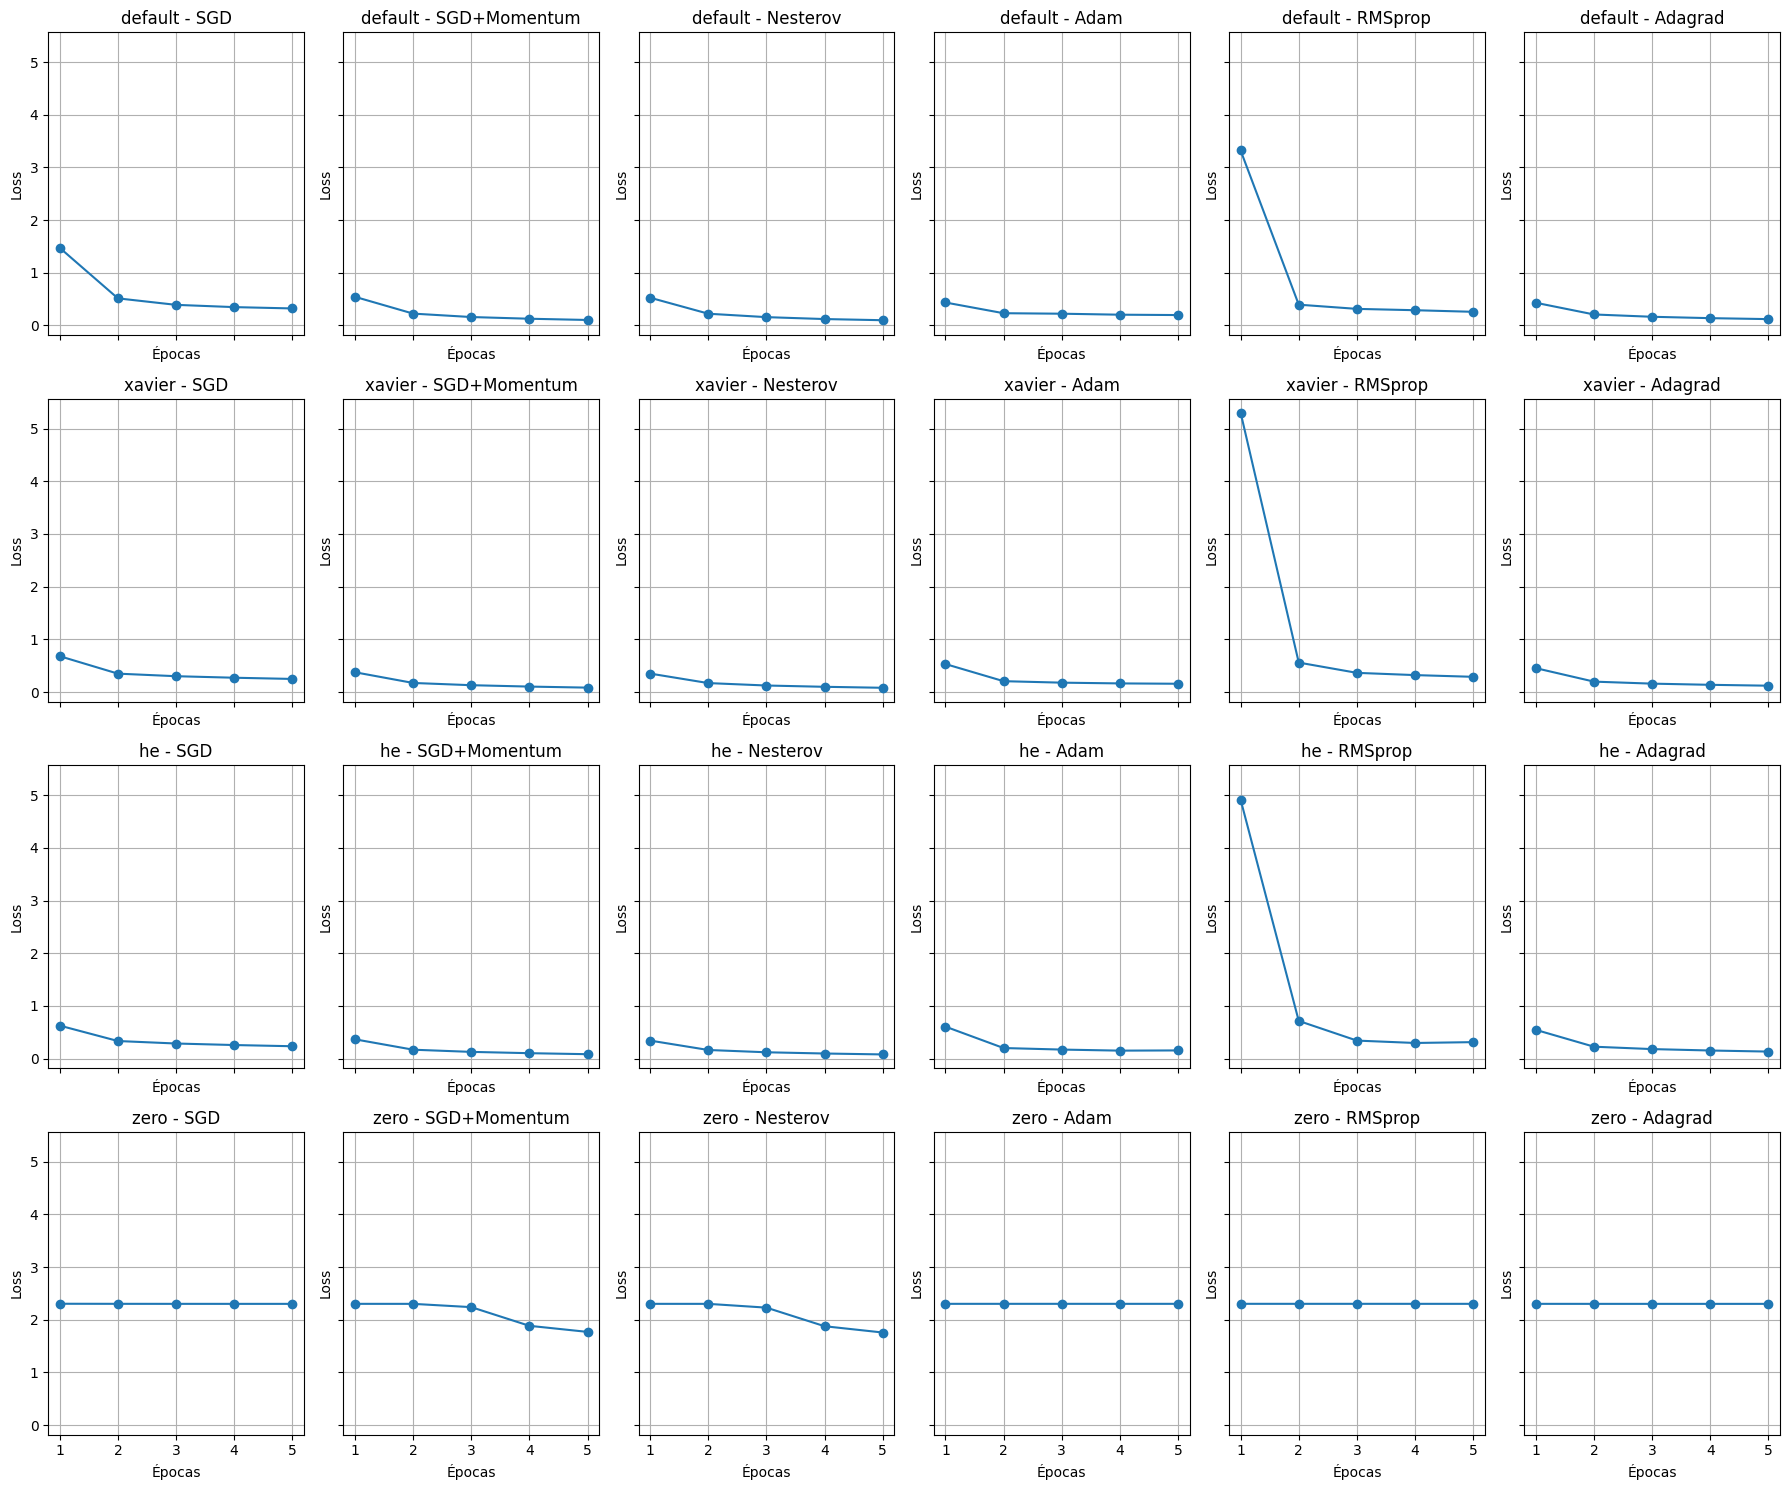

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Definir a semente para garantir reprodutibilidade
def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    torch.cuda.manual_seed_all(seed)

# Definição dos hiperparâmetros
batch_size = 128  # Tamanho do lote
learning_rate = 0.01  # Taxa de aprendizado
epochs = 5  # Número de épocas
seed_value = 42  # Valor da semente para reprodutibilidade

# Carregar e transformar o dataset MNIST
# Normaliza os valores de pixel para o intervalo [-1, 1]
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Definição da rede neural MLP
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Achata a entrada para um vetor
        x = torch.relu(self.fc1(x))  # Ativação ReLU na primeira camada
        x = torch.relu(self.fc2(x))  # Ativação ReLU na segunda camada
        x = self.fc3(x)  # Camada de saída
        return x

# Aplicação das inicializações
def init_weights(model, init_method):
    if init_method == "xavier":
        nn.init.xavier_uniform_(model.fc1.weight)
        nn.init.xavier_uniform_(model.fc2.weight)
        nn.init.xavier_uniform_(model.fc3.weight)
    elif init_method == "he":
        nn.init.kaiming_uniform_(model.fc1.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(model.fc2.weight, nonlinearity='relu')
        nn.init.kaiming_uniform_(model.fc3.weight, nonlinearity='relu')
    elif init_method == "zero":
        nn.init.zeros_(model.fc1.weight)
        nn.init.zeros_(model.fc2.weight)
        nn.init.zeros_(model.fc3.weight)

# Função para treinar a rede neural
def train_model(init_method, optimizer_type):
    set_seed(seed_value)  # Garante reprodutibilidade
    model = MLP()
    init_weights(model, init_method)  # Aplica a inicialização selecionada

    criterion = nn.CrossEntropyLoss()  # Função de perda

    # Escolher o otimizador
    if optimizer_type == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_type == "SGD+Momentum":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    elif optimizer_type == "Nesterov":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer_type == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_type == "RMSprop":
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
    elif optimizer_type == "Adagrad":
        optimizer = optim.Adagrad(model.parameters(), lr=learning_rate)

    train_losses = []

    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"Inicialização: {init_method} | Otimizador: {optimizer_type} | Época [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

    return train_losses

# Definir inicializações e otimizadores a serem testados
init_methods = ["default", "xavier", "he", "zero"]
optimizers = ["SGD", "SGD+Momentum", "Nesterov", "Adam", "RMSprop", "Adagrad"]

# Dicionário para armazenar os resultados
loss_results = {}

# Treinar todas as combinações de inicialização e otimizador
for init_method, opt in itertools.product(init_methods, optimizers):
    print(f"\nTreinando com Inicialização: {init_method} e Otimizador: {opt}\n")
    loss_results[(init_method, opt)] = train_model(init_method, opt)

# Criar gráfico para comparar as performances
plt.figure(figsize=(12, 8))
for (init_method, opt), losses in loss_results.items():
    label = f"{init_method} - {opt}"
    plt.plot(range(1, epochs+1), losses, marker='o', linestyle='-', label=label)

plt.xlabel("Épocas")
plt.ylabel("Loss Médio")
plt.title("Comparação de Inicializações e Otimizadores")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Criando gráficos individuais
fig, axes = plt.subplots(len(init_methods), len(optimizers), figsize=(18, 15), sharex=True, sharey=True)

for i, init_method in enumerate(init_methods):
    for j, opt in enumerate(optimizers):
        axes[i, j].plot(range(1, epochs+1), loss_results[(init_method, opt)], marker='o', linestyle='-')
        axes[i, j].set_title(f"{init_method} - {opt}")
        axes[i, j].set_xlabel("Épocas")
        axes[i, j].set_ylabel("Loss")
        axes[i, j].grid(True)

# Ajustar layout
plt.tight_layout()
plt.show()



Observando os gráfico, nota-se que inicialização zero resultou em uma linha reta para todos os casos, onde apenas SGD + Momentum e Nestereov consguiram se afastar dela um pouco. Isso indica que o modelo parou de aprender ou aprende muito pouco. No geral, para esse cenário, os diferentes casos resultaram em valores relativamente próximos, sendo a mudança mais perceptível o loss inicial, principlamente do RMSprop. Além disso, a inicialização he apresentou melhores resultados.

# 5. Reguladores

A regularização é um conjunto de técnicas utilizadas para **evitar overfitting**, garantindo que a rede neural generalize bem para novos dados. Assim, essas técnicas buscam reduzir a variância da predição do modelo e a complexidade dele.

## 5.1. L1 e L2 (Penalidades Lasso e Ridge)

A regularização L1 e L2 **penaliza os pesos** da rede neural, adicionando um termo extra à função de perda, sendo ele diretamente proporcional ao módulo do peso para L1 ou diretamente proporcional ao quadrado do peso para L2

Assim, para L!, a nova função de perda é dada por:

$$J(w) = \frac{1}{n} \sum_{i=1}^{n}(y_{i}-\hat y_{i}) + \lambda \sum_{i=1}^{m}|w|$$

Onde:
- $J(w)$ é a função de custo
- $m$ é o número de features
- $n$ é o número de amostras
- $y_{i}$ é o valor alvo
- $\hat y_{i}$ é o valor alvo predito
- $\lambda$ é um hiperparâmetro que controla a intensidade da regularização



Esse cálculo faz com que a rede reduza os pesos, podendo chegar a 0. Isso pode ser útil para criar modelos mais esparsos, o que pode ajudar na interpretabilidade e pode eliminar completamente algumas conexões, ignorando features irrelevantes para o contexto.

Para L2:

$$J(w) = \frac{1}{n} \sum_{i=1}^{n}(y_{i}-\hat y_{i}) + \lambda \sum_{i=1}^{m}w^2$$

Esse cálculo também faz os pesos reduzirem, porém pesos grandes são maispenalizados do que pesos pequenos, sendo reduzidos gradualmente mas sem chrgar a 0. Isso é útil quando se quer reduzir a variância do modelo e manter todas as variáveis.

## 5.2. Dropout

A técnica de dropout se baseia em aleatoriamente **desligar uma parcela dos neurônios durante a etapa de treinamento**, reduzindo a complexidade da rede. Durante cada passo do treinamento, cada neurônio tem uma probabilidade $p$ de ser desligado e uma probabilidade $1-p$ de permanecer ligado. Quando a rede for para fase de testes, ela deve operar com todos os neurônios ativos, então para compensar a falata de neurônios no treinamento, os pesos das redes são multiplicados pela probabilidade de permanência $1-p$. Geralmente $p=0.5$

Essa técnica geralmente é utilizada em redes neurais profundas e redes com muitas camadas densas, onde o risco de overfitting é maior devido ao grande número de parâmetros, mas deve ser evittadas em modelos pequenos ou com poucos dados.

**Vantagens**:
- Aumenta a generalização da rede
- Evita que a rede dependa muito de um neurônio ou conexão específicas

**Desvantagens**
- Aumento no tempo de treinamento
- Valores inadequados de $p$ podem gerar underfitting ou ser ineficazes contra overfitting
  

## 5.3. Batch Normalization

A ideia desse método é **normalizar** as saídas dos neurônios em mini pacotes (batches) em todas as suas camadas, ou seja, deixar a distribuição dos valores com média 0 e variância 1. Para cada saída $x$ de um batch é feita a seguinte conta:

$$\hat x_{i} = \frac{x_{i} - \mu_{B}}{\sqrt{\sigma_{B}^2 + \varepsilon}}$$

Após isso, são introduzidos o parâmetros $\gamma$ e $\beta$

$$y_{i} = \gamma \hat x_{i} + \beta$$

Onde:
- $\hat x_{i}$ éa saída após a normalização
- $\mu_{B}$ é a média do batch
- $\sigma_{B}^2$ é a variância do batche
- $\varepsilon$ é um hiperparâmetro para evitar divisões por 0
- $y_{i}$ é o valor da saída após as transformações de $\gamma$ e $\beta$
- $\gamma$ é o parâmetro responsávol por escalonar a saída
- $\beta$ é o parâmetro responsável por deslocar a saída

Esse método aumenta a velocidade total do treinamento e atua como regularizador, visto que as médias e variâncias usadas nas normalizações são alttamente dependentes de cada batch.

### **Como a regularização interage com inicialização de pesos**

Interação entre Regularização e Inicialização de Pesos
A regularização (como L1, L2, Dropout e Batch Normalization) controla a complexidade do modelo para evitar overfitting, enquanto a inicialização de pesos afeta a velocidade de convergência e evita problemas como o desaparecimento ou explosão de gradientes. A escolha de um bom esquema de inicialização pode complementar ou atenuar os efeitos da regularização. Aqui estão algumas interações importantes:

1. **Regularização L2 (Ridge)**
- Se os pesos forem inicializados com valores muito altos, a regularização L2 terá um efeito maior no início do treinamento, reduzindo drasticamente os pesos e podendo desacelerar a aprendizagem.

- Inicializações como Xavier (Glorot) ou He geralmente já garantem que os pesos comecem em uma escala razoável, reduzindo a necessidade de correções extremas via regularização.

2. **Regularização L1 (Lasso)**

- A regularização L1 incentiva pesos esparsos, eliminando alguns completamente.
Se os pesos forem inicializados muito pequenos, a regularização L1 pode zerá-los rapidamente, tornando a rede subótima.

- Para esse caso, uma inicialização que garanta que os pesos não sejam muito próximos de zero pode ajudar a manter a expressividade do modelo.

3. **Dropout**

- O Dropout desativa aleatoriamente unidades durante o treinamento, reduzindo a dependência de neurônios específicos.

- Se a inicialização dos pesos for muito pequena, os valores das ativações podem cair significativamente ao longo das camadas, reduzindo a eficácia do modelo.

- Se for muito grande, a ativação de alguns neurônios pode dominar o treinamento, levando a uma convergência ruim.

- Inicialização de He é frequentemente usada com Dropout, pois compensa a variação nas ativações ao longo da rede.

4. **Batch Normalization**

- O Batch Normalization (BN) normaliza as ativações antes de cada camada, reduzindo a dependência de uma inicialização cuidadosa.

- Com BN, a escolha da inicialização ainda é importante, mas seus efeitos são mitigados porque a normalização mantém a escala das ativações estável durante o treinamento.

- Isso permite inicializações um pouco mais agressivas sem risco de gradientes explodirem ou desaparecerem.

## 5.4 Comparação das Regularizações (Tensorflow e Pythorch)

A seguir será feita uma comparação de desempenho de reguladores para um mesmo cenário. Nesse caso, será usado o SGD na base de dados do MNIST, com função de ativação ReLU. Ao final será plotado um gráfico o loss médio por épocas de todos reguladores.


Treinando modelo: Sem Regularização


Treinando modelo: Com Dropout


Treinando modelo: Com BatchNorm


Treinando modelo: Com Weight Decay (L2)


Treinando modelo: Dropout + BatchNorm


Treinando modelo: Dropout + Weight Decay


Treinando modelo: BatchNorm + Weight Decay


Treinando modelo: Dropout + BatchNorm + Weight Decay



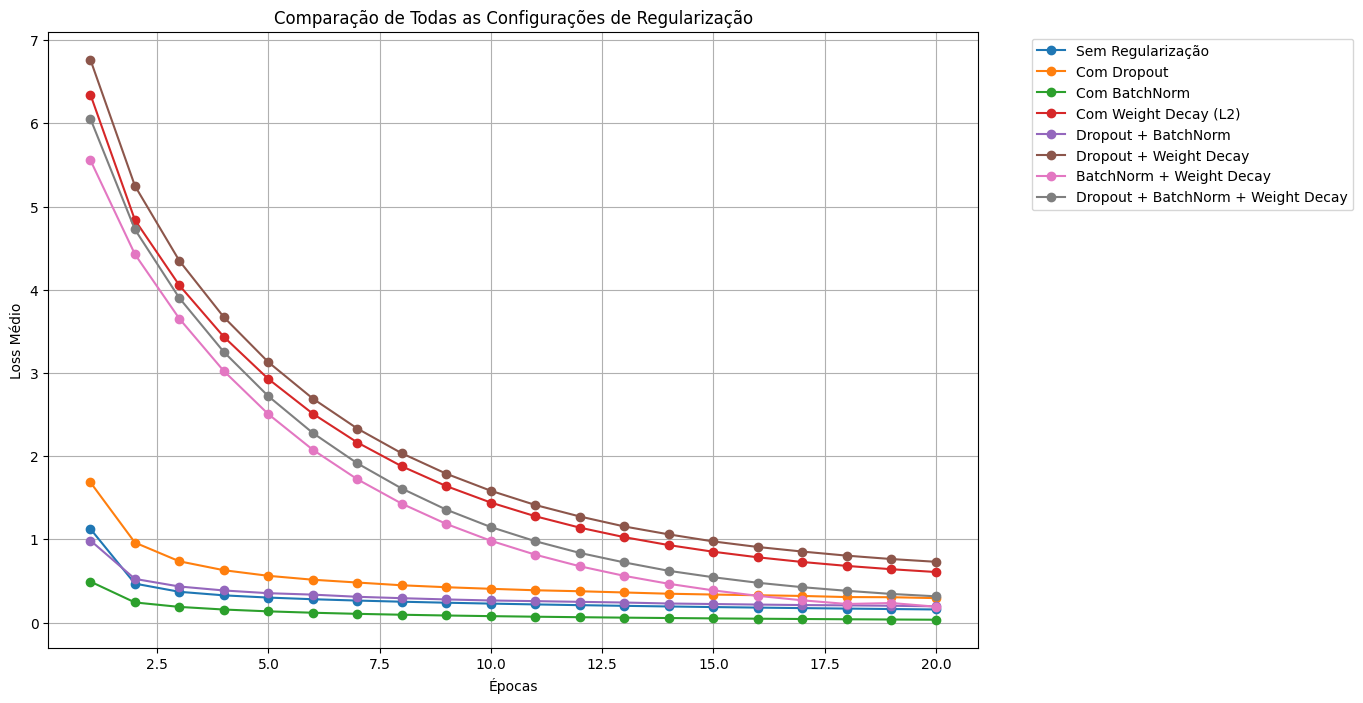

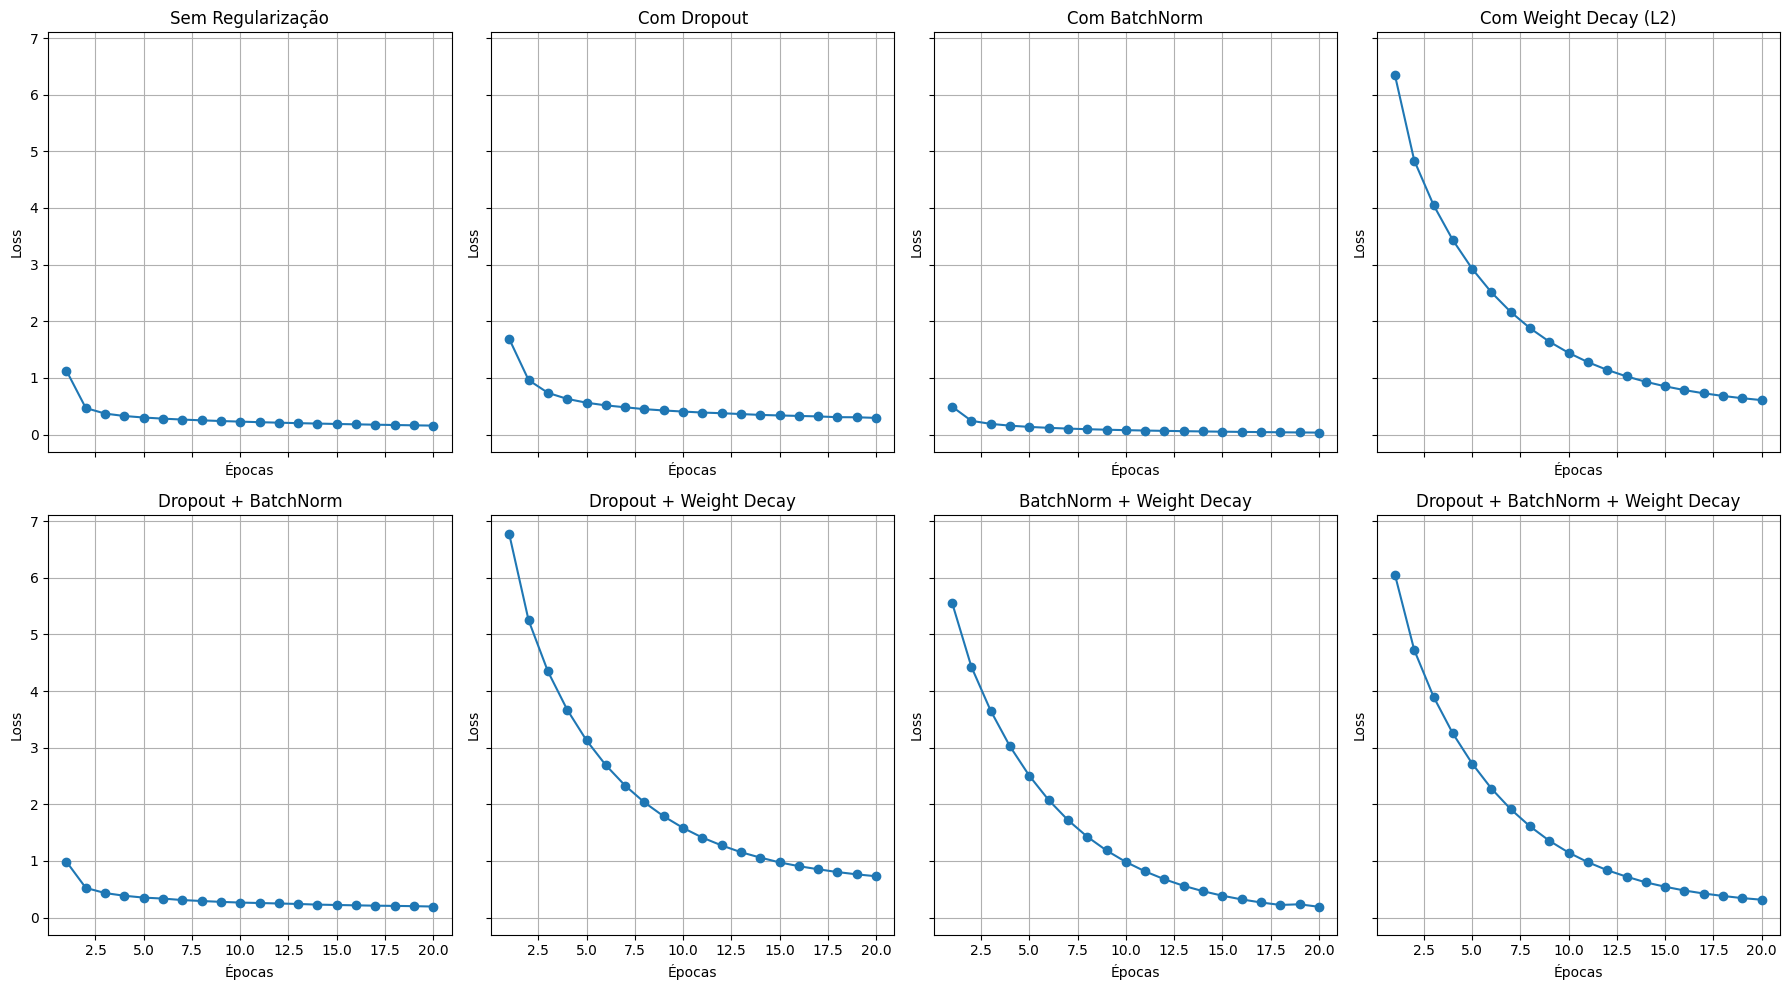

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import SGD

# Definir a semente para garantir reprodutibilidade
# Isso assegura que os resultados serão os mesmos em cada execução

def set_seed(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)

# Definição dos hiperparâmetros
batch_size = 128  # Tamanho do lote para treinamento
learning_rate = 0.01  # Taxa de aprendizado do otimizador
epochs = 20  # Número de épocas para treinamento
weight_decay_value = 0.01  # Regularização L2 para evitar overfitting
dropout_rate = 0.5  # Taxa de dropout para regularização
seed_value = 42  # Valor da semente para reprodutibilidade

# Carregar o dataset MNIST (dígitos escritos à mão)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar os dados para que os valores fiquem entre 0 e 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Redimensionar os dados para um vetor de entrada de 784 pixels (28x28)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Função para criar o modelo de rede neural
# Parâmetros opcionais para incluir Dropout, Batch Normalization e Weight Decay
def create_model(use_dropout=False, use_batchnorm=False, use_weight_decay=False):
    model = Sequential()

    # Primeira camada densa com 256 neurônios e ativação ReLU
    model.add(Dense(256, input_shape=(28 * 28,), activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(weight_decay_value) if use_weight_decay else None))

    # Se batch normalization estiver ativado, adiciona a camada correspondente
    if use_batchnorm:
        model.add(BatchNormalization())

    # Se dropout estiver ativado, adiciona a camada correspondente
    if use_dropout:
        model.add(Dropout(dropout_rate))

    # Segunda camada densa com 128 neurônios e ativação ReLU
    model.add(Dense(128, activation='relu',
                    kernel_regularizer=tf.keras.regularizers.l2(weight_decay_value) if use_weight_decay else None))

    if use_batchnorm:
        model.add(BatchNormalization())
    if use_dropout:
        model.add(Dropout(dropout_rate))

    # Camada de saída com 10 neurônios (um para cada dígito) e ativação softmax
    model.add(Dense(10, activation='softmax'))

    return model

# Função para treinar o modelo com diferentes configurações de regularização
def train_model(use_dropout=False, use_batchnorm=False, use_weight_decay=False):
    set_seed(seed_value)  # Garante que os resultados sejam reproduzíveis
    model = create_model(use_dropout, use_batchnorm, use_weight_decay)  # Cria o modelo

    # Define o otimizador SGD com a taxa de aprendizado especificada
    optimizer = SGD(learning_rate=learning_rate)

    # Compila o modelo com função de perda e métrica de acurácia
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Treina o modelo sem exibir logs detalhados (verbose=0)
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=0)

    # Retorna a lista de valores de perda para cada época
    return history.history['loss']

# Definição de diferentes configurações de regularização para testar
configs = {
    "Sem Regularização": (False, False, False),
    "Com Dropout": (True, False, False),
    "Com BatchNorm": (False, True, False),
    "Com Weight Decay (L2)": (False, False, True),
    "Dropout + BatchNorm": (True, True, False),
    "Dropout + Weight Decay": (True, False, True),
    "BatchNorm + Weight Decay": (False, True, True),
    "Dropout + BatchNorm + Weight Decay": (True, True, True)
}

loss_results = {}  # Dicionário para armazenar os resultados de perda

# Treinar o modelo para cada configuração definida
for config_name, (dropout, batchnorm, weight_decay) in configs.items():
    print(f"\nTreinando modelo: {config_name}\n")
    loss_results[config_name] = train_model(dropout, batchnorm, weight_decay)

# Criar gráfico para comparar os desempenhos de todas as configurações
plt.figure(figsize=(12, 8))
for config, losses in loss_results.items():
    plt.plot(range(1, epochs+1), losses, marker='o', linestyle='-', label=config)

plt.xlabel("Épocas")
plt.ylabel("Loss Médio")
plt.title("Comparação de Todas as Configurações de Regularização")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Criando subplots individuais para cada configuração de regularização
fig, axes = plt.subplots(2, 4, figsize=(18, 10), sharex=True, sharey=True)

config_list = list(loss_results.keys())

for i, config in enumerate(config_list):
    row, col = divmod(i, 4)  # Define a posição no subplot (2 linhas, 4 colunas)
    axes[row, col].plot(range(1, epochs+1), loss_results[config], marker='o', linestyle='-')
    axes[row, col].set_title(f"{config}")
    axes[row, col].set_xlabel("Épocas")
    axes[row, col].set_ylabel("Loss")
    axes[row, col].grid(True)

# Ajustar layout para melhor visualização
plt.tight_layout()
plt.show()




Treinando modelo: Sem Regularização

Dropout: False | BatchNorm: False | Weight Decay: False | Época [1/20], Loss: 1.4731
Dropout: False | BatchNorm: False | Weight Decay: False | Época [2/20], Loss: 0.5148
Dropout: False | BatchNorm: False | Weight Decay: False | Época [3/20], Loss: 0.3916
Dropout: False | BatchNorm: False | Weight Decay: False | Época [4/20], Loss: 0.3488
Dropout: False | BatchNorm: False | Weight Decay: False | Época [5/20], Loss: 0.3235
Dropout: False | BatchNorm: False | Weight Decay: False | Época [6/20], Loss: 0.3048
Dropout: False | BatchNorm: False | Weight Decay: False | Época [7/20], Loss: 0.2892
Dropout: False | BatchNorm: False | Weight Decay: False | Época [8/20], Loss: 0.2755
Dropout: False | BatchNorm: False | Weight Decay: False | Época [9/20], Loss: 0.2633
Dropout: False | BatchNorm: False | Weight Decay: False | Época [10/20], Loss: 0.2517
Dropout: False | BatchNorm: False | Weight Decay: False | Época [11/20], Loss: 0.2406
Dropout: False | BatchNor

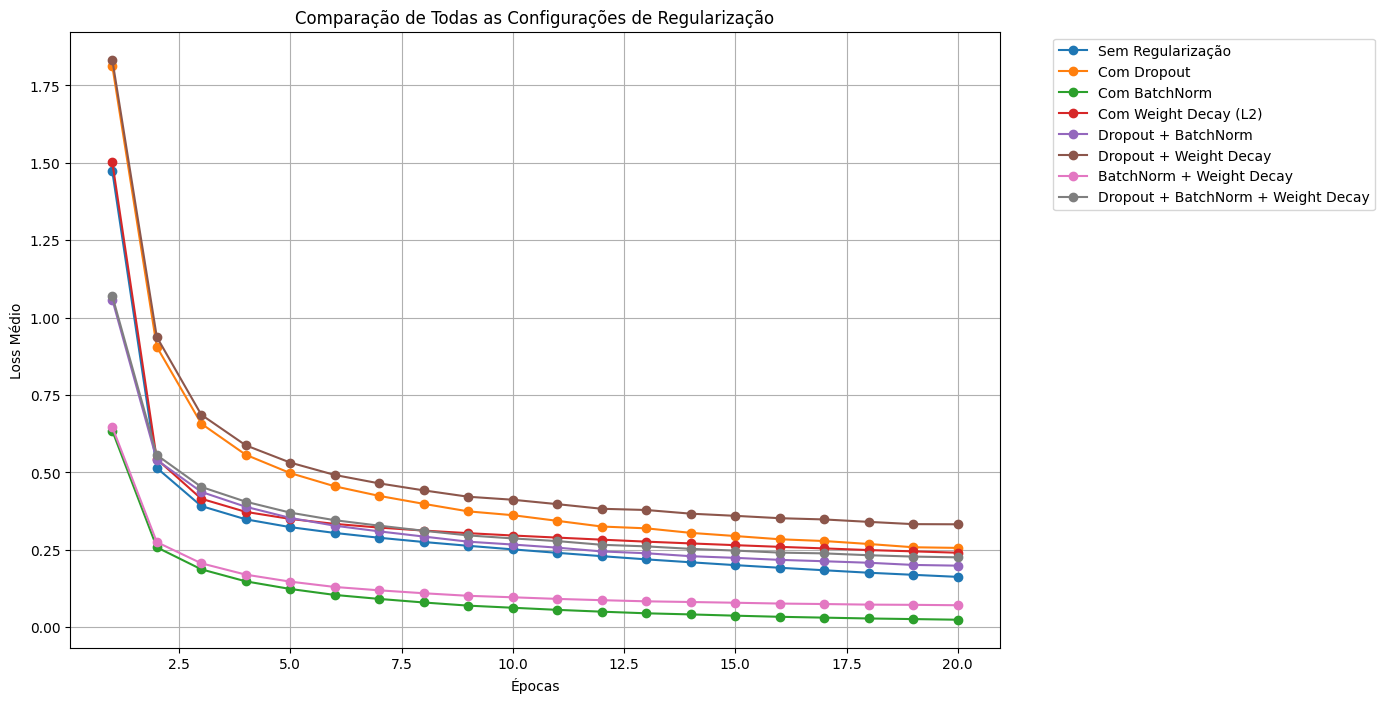

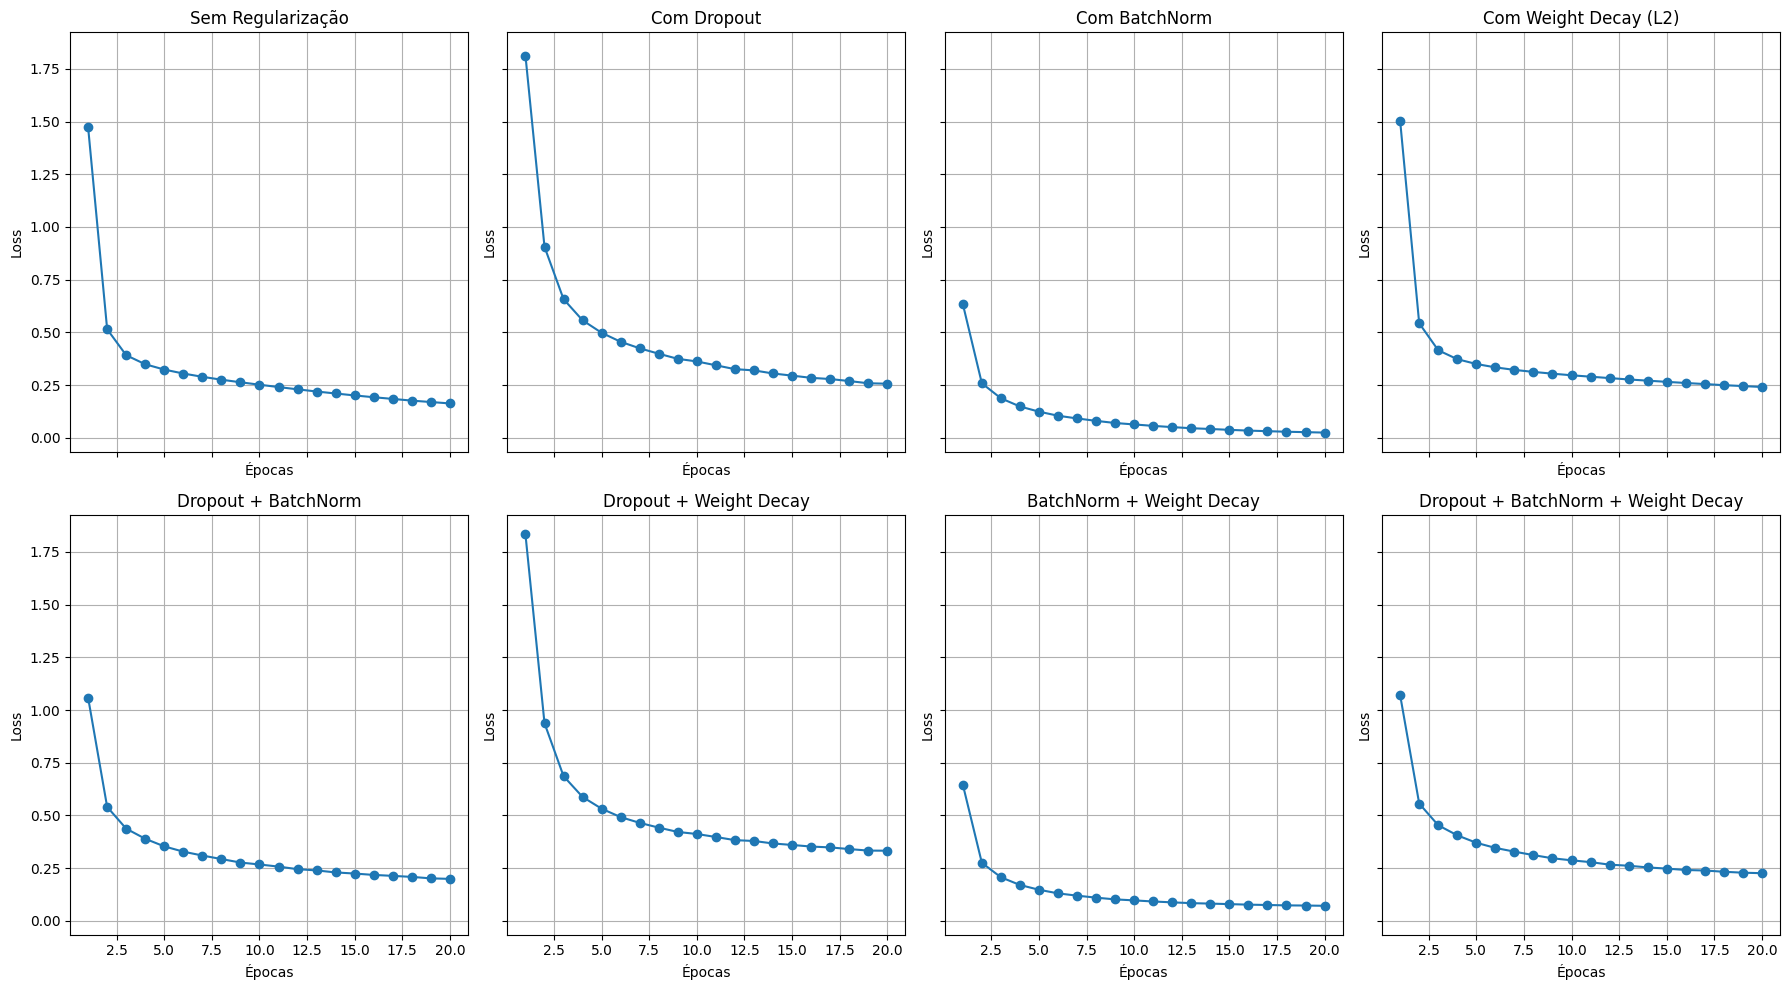

In [ ]:
# Reimportando as bibliotecas após o reset do estado
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Definir a semente para garantir reprodutibilidade
def set_seed(seed=42):
    torch.manual_seed(seed)
    np.random.seed(seed)
    torch.cuda.manual_seed_all(seed)

# Definição dos hiperparâmetros
batch_size = 128
learning_rate = 0.01
epochs = 20
weight_decay_value = 0.01  # Regularização L2
dropout_rate = 0.5    # Taxa de dropout
seed_value = 42

# Carregar e transformar o dataset MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Definição da rede neural MLP com e sem regularização
class MLP(nn.Module):
    def __init__(self, use_dropout=False, use_batchnorm=False, use_weight_decay=False):
        super(MLP, self).__init__()
        self.use_batchnorm = use_batchnorm
        self.use_dropout = use_dropout

        self.fc1 = nn.Linear(28 * 28, 256)
        self.bn1 = nn.BatchNorm1d(256) if use_batchnorm else None
        self.dropout1 = nn.Dropout(p=dropout_rate) if use_dropout else None

        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128) if use_batchnorm else None
        self.dropout2 = nn.Dropout(p=dropout_rate) if use_dropout else None

        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        if self.use_batchnorm:
            x = self.bn1(x)
        x = torch.relu(x)
        if self.use_dropout:
            x = self.dropout1(x)

        x = self.fc2(x)
        if self.use_batchnorm:
            x = self.bn2(x)
        x = torch.relu(x)
        if self.use_dropout:
            x = self.dropout2(x)

        x = self.fc3(x)
        return x

# Função para treinar a rede neural corretamente aplicando Weight Decay
def train_model(use_dropout=False, use_batchnorm=False, use_weight_decay=False):
    set_seed(seed_value)  # Garante reprodutibilidade
    model = MLP(use_dropout, use_batchnorm, use_weight_decay)

    criterion = nn.CrossEntropyLoss()

    # Aplicando weight decay corretamente no otimizador
    optimizer = optim.SGD(
        model.parameters(),
        lr=learning_rate,
        weight_decay=weight_decay_value if use_weight_decay else 0.0  # Correção Aqui
    )

    train_losses = []

    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"Dropout: {use_dropout} | BatchNorm: {use_batchnorm} | Weight Decay: {use_weight_decay} | Época [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

    return train_losses

# Teste das diferentes configurações de regularização
configs = {
    "Sem Regularização": (False, False, False),
    "Com Dropout": (True, False, False),
    "Com BatchNorm": (False, True, False),
    "Com Weight Decay (L2)": (False, False, True),
    "Dropout + BatchNorm": (True, True, False),
    "Dropout + Weight Decay": (True, False, True),
    "BatchNorm + Weight Decay": (False, True, True),
    "Dropout + BatchNorm + Weight Decay": (True, True, True)
}

loss_results = {}

# Treinar todas as configurações
for config_name, (dropout, batchnorm, weight_decay) in configs.items():
    print(f"\nTreinando modelo: {config_name}\n")
    loss_results[config_name] = train_model(dropout, batchnorm, weight_decay)

# Criando gráficos para comparar as performances

# Gráfico Comparativo
plt.figure(figsize=(12, 8))
for config, losses in loss_results.items():
    plt.plot(range(1, epochs+1), losses, marker='o', linestyle='-', label=config)

plt.xlabel("Épocas")
plt.ylabel("Loss Médio")
plt.title("Comparação de Todas as Configurações de Regularização")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Criando subplots individuais para cada configuração de regularização
fig, axes = plt.subplots(2, 4, figsize=(18, 10), sharex=True, sharey=True)

config_list = list(loss_results.keys())

for i, config in enumerate(config_list):
    row, col = divmod(i, 4)  # Define a posição no subplot (2 linhas, 4 colunas)
    axes[row, col].plot(range(1, epochs+1), loss_results[config], marker='o', linestyle='-')
    axes[row, col].set_title(f"{config}")
    axes[row, col].set_xlabel("Épocas")
    axes[row, col].set_ylabel("Loss")
    axes[row, col].grid(True)

# Ajustar layout para melhor visualização
plt.tight_layout()
plt.show()


O gráfico mostra que o melhor desempenho foi obtido utilizando-se apenas batch normalization. Também nota-se que a curva para o treinamento sem nenhum regulador se saiu melhor do que curvas com múltiplos reguladores. Isso mostra que é importante levar em consideração o contexto do problema para escolher uma boa opção, visto que aplicar várias técnicas indiscriminadamente pode resultar em desemenhos piores

# 6. Learning Rate Scheduling: Melhorando a Convergência

## 6.1 O que são Schedulers e Por que Usar?

Os schedulers de taxa de aprendizado são técnicas utilizadas para ajustar a taxa de aprendizado durante o treinamento de modelos de aprendizado de máquina. A taxa de aprendizado (learning rate) é um hiperparâmetro crucial que determina o quão grande será o passo de atualização dos pesos do modelo em cada iteração. Se a taxa de aprendizado for muito alta, o modelo pode pular o mínimo global, resultando em uma má convergência. Por outro lado, se for muito baixa, o treinamento pode ser extremamente lento.
## 6.2 Benefícios dos Schedulers:

Aceleração da Convergência: Ajustar a taxa de aprendizado ao longo do treinamento pode ajudar o modelo a convergir mais rapidamente.

Evitar Mínimos Locais: Uma taxa de aprendizado adaptativa pode ajudar o modelo a sair de mínimos locais e encontrar uma solução melhor.

Estabilidade do Treinamento: Reduzir a taxa de aprendizado de forma adequada pode estabilizar o processo de treinamento e melhorar a performance geral.

## 6.3 Principais Tipos de Agendadores de Taxa de Aprendizado

##StepLR (Redução por Steps Fixos)

O StepLR reduz a taxa de aprendizado em intervalos regulares (steps). Isso pode ser útil em situações onde o treinamento inicial rápido é desejado, mas uma taxa de aprendizado menor é necessária para ajuste fino nos estágios posteriores.

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn

# Define a simple linear model
model = nn.Linear(10, 2) # Input size 10, output size 2

optimizer = optim.SGD(model.parameters(), lr=0.1)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

for epoch in range(100):
    # treinamento
    # Sample input (replace with your actual training data)
    inputs = torch.randn(1, 10)
    optimizer.zero_grad()  # Clear previous gradients
    outputs = model(inputs) # perform a forward pass
    loss = outputs.sum()  # Sample loss (replace with your actual loss)
    loss.backward() #calculate the gradients
    optimizer.step() # update the weights

    scheduler.step()

    print(f"Epoch {epoch}, LR: {scheduler.get_last_lr()[0]}")

Epoch 0, LR: 0.1
Epoch 1, LR: 0.1
Epoch 2, LR: 0.1
Epoch 3, LR: 0.1
Epoch 4, LR: 0.1
Epoch 5, LR: 0.1
Epoch 6, LR: 0.1
Epoch 7, LR: 0.1
Epoch 8, LR: 0.1
Epoch 9, LR: 0.1
Epoch 10, LR: 0.1
Epoch 11, LR: 0.1
Epoch 12, LR: 0.1
Epoch 13, LR: 0.1
Epoch 14, LR: 0.1
Epoch 15, LR: 0.1
Epoch 16, LR: 0.1
Epoch 17, LR: 0.1
Epoch 18, LR: 0.1
Epoch 19, LR: 0.1
Epoch 20, LR: 0.1
Epoch 21, LR: 0.1
Epoch 22, LR: 0.1
Epoch 23, LR: 0.1
Epoch 24, LR: 0.1
Epoch 25, LR: 0.1
Epoch 26, LR: 0.1
Epoch 27, LR: 0.1
Epoch 28, LR: 0.1
Epoch 29, LR: 0.010000000000000002
Epoch 30, LR: 0.010000000000000002
Epoch 31, LR: 0.010000000000000002
Epoch 32, LR: 0.010000000000000002
Epoch 33, LR: 0.010000000000000002
Epoch 34, LR: 0.010000000000000002
Epoch 35, LR: 0.010000000000000002
Epoch 36, LR: 0.010000000000000002
Epoch 37, LR: 0.010000000000000002
Epoch 38, LR: 0.010000000000000002
Epoch 39, LR: 0.010000000000000002
Epoch 40, LR: 0.010000000000000002
Epoch 41, LR: 0.010000000000000002
Epoch 42, LR: 0.01000000000000000

#ExponentialLR (Decaimento Exponencial)

O ExponentialLR aplica um decaimento exponencial à taxa de aprendizado, o que pode ser vantajoso em cenários onde um decaimento gradual é preferível.


In [ ]:
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

for epoch in range(100):
    # treinamento do modelo
    optimizer.step()
    scheduler.step()

    print(f"Epoch {epoch}, LR: {scheduler.get_last_lr()[0]}")


Epoch 0, LR: 9.000000000000003e-05
Epoch 1, LR: 8.100000000000003e-05
Epoch 2, LR: 7.290000000000002e-05
Epoch 3, LR: 6.561000000000002e-05
Epoch 4, LR: 5.904900000000002e-05
Epoch 5, LR: 5.314410000000002e-05
Epoch 6, LR: 4.782969000000002e-05
Epoch 7, LR: 4.304672100000002e-05
Epoch 8, LR: 3.874204890000002e-05
Epoch 9, LR: 3.4867844010000016e-05
Epoch 10, LR: 3.138105960900002e-05
Epoch 11, LR: 2.8242953648100018e-05
Epoch 12, LR: 2.5418658283290016e-05
Epoch 13, LR: 2.2876792454961016e-05
Epoch 14, LR: 2.0589113209464913e-05
Epoch 15, LR: 1.8530201888518422e-05
Epoch 16, LR: 1.667718169966658e-05
Epoch 17, LR: 1.5009463529699922e-05
Epoch 18, LR: 1.350851717672993e-05
Epoch 19, LR: 1.2157665459056937e-05
Epoch 20, LR: 1.0941898913151244e-05
Epoch 21, LR: 9.84770902183612e-06
Epoch 22, LR: 8.862938119652508e-06
Epoch 23, LR: 7.976644307687257e-06
Epoch 24, LR: 7.1789798769185315e-06
Epoch 25, LR: 6.461081889226678e-06
Epoch 26, LR: 5.81497370030401e-06
Epoch 27, LR: 5.23347633027361

#Cosine Annealing (Ajuste Suave da Taxa de Aprendizado)

O CosineAnnealingLR ajusta a taxa de aprendizado de forma suave usando a função cosseno, o que pode ser benéfico para evitar grandes oscilações na taxa de aprendizado e proporcionar uma convergência mais suave.

In [ ]:
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)

for epoch in range(100):
    # treinamento do modelo
    optimizer.step()
    scheduler.step()

    print(f"Epoch {epoch}, LR: {scheduler.get_last_lr()[0]}")


Epoch 0, LR: 2.653519246092244e-09
Epoch 1, LR: 2.6456676605720586e-09
Epoch 2, LR: 2.6326161188191985e-09
Epoch 3, LR: 2.6144161293062797e-09
Epoch 4, LR: 2.5911395190771263e-09
Epoch 5, LR: 2.5628781502782404e-09
Epoch 6, LR: 2.5297435576208802e-09
Epoch 7, LR: 2.491866508204508e-09
Epoch 8, LR: 2.449396485438794e-09
Epoch 9, LR: 2.402501099100885e-09
Epoch 10, LR: 2.3513654238561938e-09
Epoch 11, LR: 2.2961912688532425e-09
Epoch 12, LR: 2.237196381275155e-09
Epoch 13, LR: 2.1746135869910005e-09
Epoch 14, LR: 2.108689871698461e-09
Epoch 15, LR: 2.0396854061841133e-09
Epoch 16, LR: 1.967872519548203e-09
Epoch 17, LR: 1.893534624446094e-09
Epoch 18, LR: 1.8169650985880007e-09
Epoch 19, LR: 1.738466126911196e-09
Epoch 20, LR: 1.6583475089941193e-09
Epoch 21, LR: 1.5769254364189753e-09
Epoch 22, LR: 1.4945212449080105e-09
Epoch 23, LR: 1.4114601461582246e-09
Epoch 24, LR: 1.3280699443793771e-09
Epoch 25, LR: 1.2446797426005297e-09
Epoch 26, LR: 1.161618643850744e-09
Epoch 27, LR: 1.07921

## 6.4 Interação entre Schedulers e Inicialização de Pesos


A inicialização dos pesos do modelo pode ter um impacto significativo na eficácia dos schedulers. Inicializações inadequadas podem resultar em um desempenho ruim, mesmo com a otimização da taxa de aprendizado. Por exemplo, se os pesos forem inicializados com valores muito grandes ou muito pequenos, o treinamento pode se tornar instável ou extremamente lento. Um bom ponto de partida é usar métodos de inicialização como Xavier ou He, dependendo da ativação usada no modelo.

## 6.5 Testes Práticos Comparando Diferentes Schedulers

Vamos comparar os diferentes schedulers com um exemplo prático utilizando um conjunto de dados simples.

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


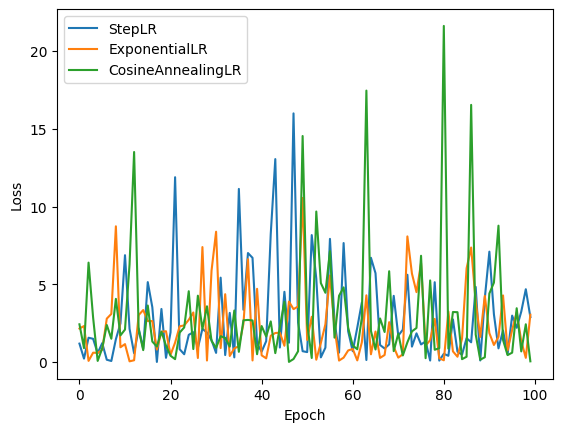

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

# Define a simple linear model
model = nn.Linear(10, 2) # Input size 10, output size 2
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss()

def train(model, optimizer, scheduler, epochs=100):
    losses = []
    for epoch in range(epochs):
        # Treinamento do modelo
        inputs = torch.randn(1, 10) # dummy input
        target = torch.randn(1, 2) # dummy target
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, target) #calculate loss
        losses.append(loss.item()) # append the numerical value of the loss, not the tensor
        loss.backward()
        optimizer.step()
        scheduler.step()

    return losses

# Schedulers
schedulers = {
    'StepLR': optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1),
    'ExponentialLR': optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9),
    'CosineAnnealingLR': optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)
}

# Treinando e plotando resultados
for name, scheduler in schedulers.items():
    # reinitialize the model and optimizer for each scheduler to be compared
    model = nn.Linear(10, 2)
    optimizer = optim.SGD(model.parameters(), lr=0.1)
    losses = train(model, optimizer, scheduler)
    plt.plot(losses, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#7.  Avaliação Final e Conclusões

##Curvas de Aprendizado (Loss x Época) para Cada Experimento

As curvas de aprendizado mostram a evolução da função de perda ao longo das épocas de treinamento. Elas são cruciais para entender o comportamento do modelo e a eficácia dos schedulers.

##Comparação entre os Diferentes Métodos

Ao comparar os diferentes métodos de agendamento de taxa de aprendizado, podemos observar as variações na convergência e estabilidade do treinamento. Por exemplo, o StepLR pode ser mais eficaz em situações onde ajustes bruscos são aceitáveis, enquanto o Cosine Annealing pode proporcionar uma convergência mais suave.

##Impacto Conjunto da Inicialização, Otimizadores, Regularização e Schedulers

A combinação desses fatores desempenha um papel essencial no desempenho final do modelo. Inicializações adequadas de pesos, a escolha correta de otimizadores (como Adam, SGD), técnicas de regularização (como dropout, weight decay) e o uso de schedulers de taxa de aprendizado podem resultar em um modelo mais robusto e eficaz.

##Conclusão sobre Melhores Estratégias

A melhor estratégia depende do problema específico. No entanto, uma abordagem equilibrada que combina inicialização de pesos, otimização, regularização e schedulers de taxa de aprendizado geralmente leva a melhores resultados. Experimentar diferentes combinações e analisar as curvas de aprendizado pode fornecer insights valiosos para ajustar a estratégia de treinamento.